# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Reynaldo Arya Budi Trisna
- **Email:** reynaldstar@gmail.com
- **ID Dicoding:** reynaldoabt

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola kualitas udara harian, bulanan, atau musiman di Beijing?
- Pertanyaan 2 : Apa pengaruh cuaca (suhu, kelembapan, kecepatan angin) terhadap tingkat polutan tertentu?
- Pertanyaan 3 : Bagaimana kualitas udara bervariasi antar stasiun pengukuran di kota?
- Pertanyaan 4 : Apa hubungan antara PM2.5 dengan parameter polutan lainnya seperti SO2, NO2, dan CO?
- Pertanyaan 5 : Bagaimana tingkat hujan memengaruhi konsentrasi polutan? 

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set tampilan plotting
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

## Data Wrangling

### Gathering Data

In [3]:
# Membaca dataset
df = pd.read_csv(r'D:\backup\download\house-prices-advanced-regression-techniques\air-quality-analysis\dashboard\main_data.csv')

**Insight:**
- for Gathering data saya menggunakan python file terpisah dengan menggabungkan type file csv menjadi satu ke main_data

### Assessing Data

In [4]:
# Memeriksa informasi dataset
print("Info Dataset:")
df.info()

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [5]:
# Menampilkan sample data
print("\nSample Data:")
print(df.head())

# Memeriksa missing values awal
print("\nMissing Values:")
print(df.isnull().sum())



Sample Data:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  

Missing Values:
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES    

In [6]:
# Memeriksa statistik dasar
print("\nStatistik Dasar:")
print(df.describe())



Statistik Dasar:
                  No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      80.822391      91.772426      21.650603   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.7

**Insight:**
- Dataset terdiri dari 420,768 baris dan 17 kolom.
- Tipe data pada kolom-kolom utama sudah sesuai, Kolom numerik seperti PM2.5, PM10, TEMP bertipe float64 dan Kolom kategorikal seperti station dan wd bertipe object.
- Missing Value : 
    ```
    PM2.5   : 8739 nilai hilang.
    PM10    : 6449 nilai hilang.
    CO      : 20701 nilai hilang.
    SO2     : 9021 nilai hilang
    NO2     : 12116 nilai hilang
    CO      : 20701 nilai hilang
    O3      : 13277 nilai hilang
    TEMP    : 398 nilai hilang
    PRES    : 393 nilai hilang
    DEWP    : 403 nilai hilang
    RAIN    : 390 nilai hilang
    wd      : 1822 nilai hilang
    WSPM    : 318 nilai hilang
    ```
- Polutan Utama : 
    ```
    PM2.5:
    - Nilai rata-rata: 79.8 µg/m³.
    - Maksimum: 999 µg/m³ (mungkin outlier atau keadaan asli).
    PM10:
    - Nilai rata-rata: 104.6 µg/m³.
    - Maksimum: 999 µg/m³ (mungkin outlier atau keadaan asli).
    CO:
    - Nilai rata-rata: 1230.8 µg/m³.
    - Maksimum: 10,000 µg/m³
    ```
- Cuaca : 
    ```
    TEMP (suhu): Rata-rata 13.54°C, dengan rentang dari -19.9°C hingga 41.6°C.
    RAIN (curah hujan): Sebagian besar nilai adalah 0, dengan maksimum 72.5 mm.
    WSPM (kecepatan angin): Rata-rata 1.73 m/s.
    ```
- Potensi Outlier : 
Kolom PM2.5, PM10, dan CO menunjukkan beberapa nilai ekstrem (maksimum = 999 dan 10,000). Nilai ini kemungkinan adalah outliers yang perlu ditangani.

- Distribusi Data Waktu : 
Data mencakup periode waktu dari 2013 hingga 2017.
Kolom waktu (year, month, day, hour) dapat digunakan untuk analisis musiman atau tren jangka panjang.


### Cleaning Data

In [7]:
# Penanganan Missing Values
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for column in numeric_columns:
    # Mengisi missing values dengan interpolasi
    df[column] = df[column].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

print("\nMissing Values Setelah Cleaning:")
print(df.isnull().sum())

C:\Users\reyna\AppData\Local\Temp\ipykernel_18924\3709885164.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column] = df[column].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')



Missing Values Setelah Cleaning:
No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64


**Insight:**
- 0 missing value 
- wd adalah kolom kategorical
- outlier tidak ditangani

## Exploratory Data Analysis (EDA)

### Explore Distribusi Polutan 

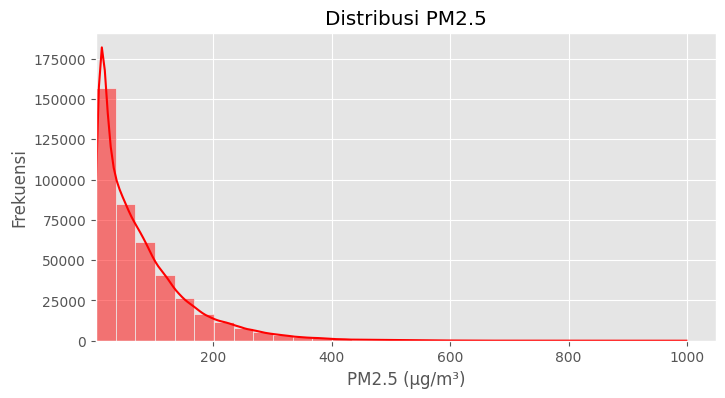

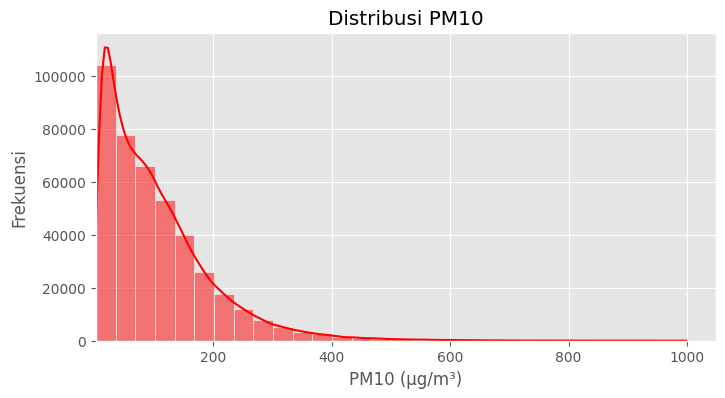

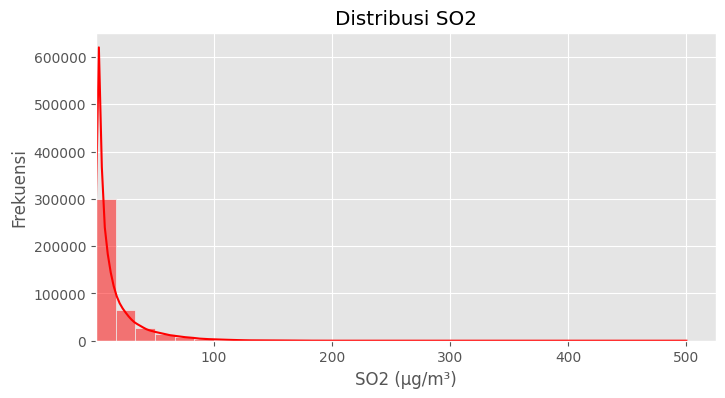

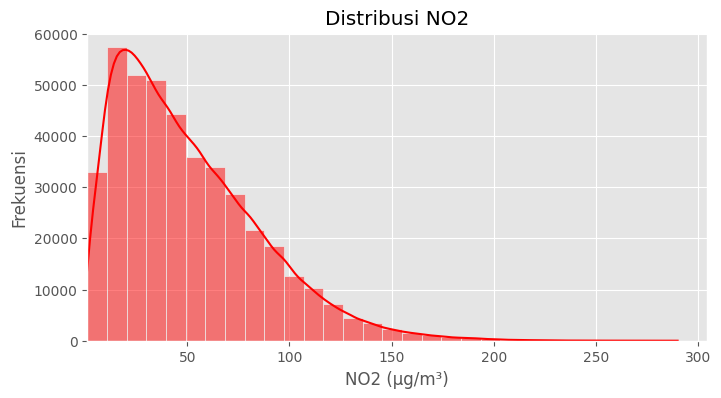

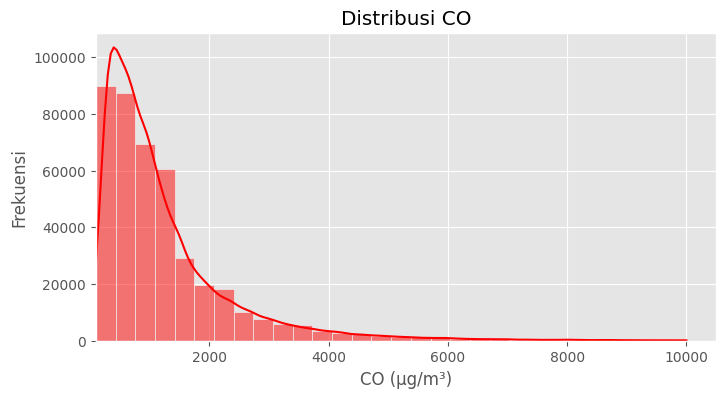

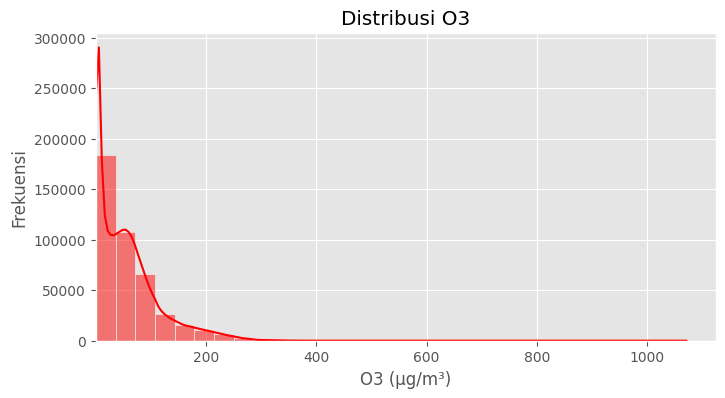

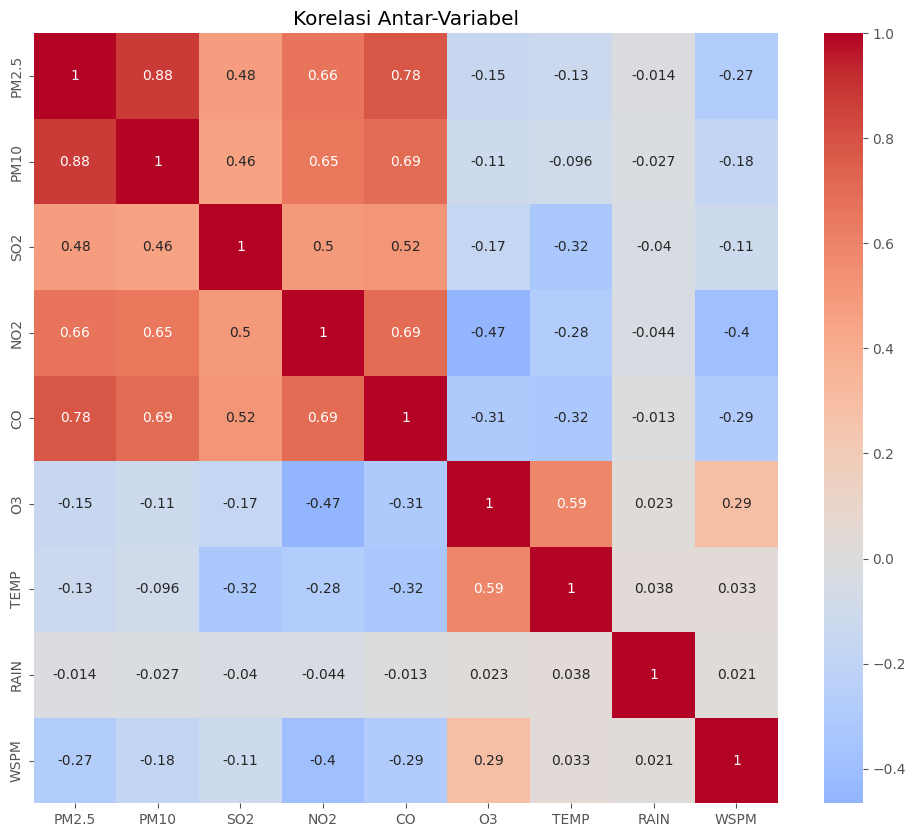

In [8]:
# Visualisasi distribusi untuk semua polutan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

for pollutant in pollutants:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[pollutant], kde=True, bins=30, color='red')
    plt.title(f'Distribusi {pollutant}')
    plt.xlabel(f'{pollutant} (µg/m³)')
    plt.ylabel('Frekuensi')
    plt.xlim(left=df[pollutant].min())
    plt.show()

# Heatmap korelasi antar-variabel
plt.figure(figsize=(12, 10))
sns.heatmap(df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN', 'WSPM']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi Antar-Variabel')
plt.show()

**Insight:**
- Semua Polutan dengan Pola Right-skewed, menandakan sebagian besar nilai berada di kisaran rendah hingga sedang dan beberapa yang berkisaran tinggi namun tidak sepenuhnya right-skewed yang sempurna
- PM2.5 :
    - Tingginya nilai PM2.5 dapat terjadi selama musim dingin korelasi positif (season)
    - Hujan (RAIN) dan Kecepatan Angin (WSPM) Berkolerasi Negatif dengan PM2.5
- PM10  :
    - Konsentrasi PM10 Lebih Tinggi di Lokasi dengan Aktivitas Manusia (station)
    - Kecepatan Angin (WSPM) berkolerasi negatif dengan PM10
- SO2  :
    - Konsentrasi SO2 Lebih Tinggi di Lokasi dengan Aktivitas Manusia (station)
    - Hujan (RAIN) berkolerasi negatif konsentrasi SO2
- NO2  :
    - Konsentrasi NO2 Lebih Tinggi di Lokasi dengan Aktivitas Manusia (station)
    - Jam (hour) berkolerasi positif dengan konsentrasi NO2 di jam sibuk
- CO  :
    - Konsentrasi CO Lebih Tinggi di Lokasi dengan Aktivitas Manusia (station)
    - Kecepatan Angin (WSPM) berkolerasi negatif dengan CO
- O3  :
    - Jam (hour) berkolerasi positif dengan konsentrasi O3 di saat siang hari
    - Konsentrasi O3 berkolerasi positif dengan (season) disaat musim panas


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola kualitas udara harian, bulanan, atau musiman di Beijing?

In [9]:
# Pilihan Filter Stasiun
filter_station = None  # Ubah None menjadi nama stasiun seperti "Dongsi" jika ingin memfilter stasiun tertentu.

# Terapkan filter berdasarkan stasiun
if filter_station:
    filtered_df = df[df['station'] == filter_station]
else:
    filtered_df = df  # Gunakan semua data jika tidak ada filter stasiun

# Cek data setelah filter
print(f"Data yang digunakan setelah filter stasiun ({filter_station}):")
print(filtered_df.head())


Data yang digunakan setelah filter stasiun (None):
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  5.0  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0  250.0  47.5  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0  12.0  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  


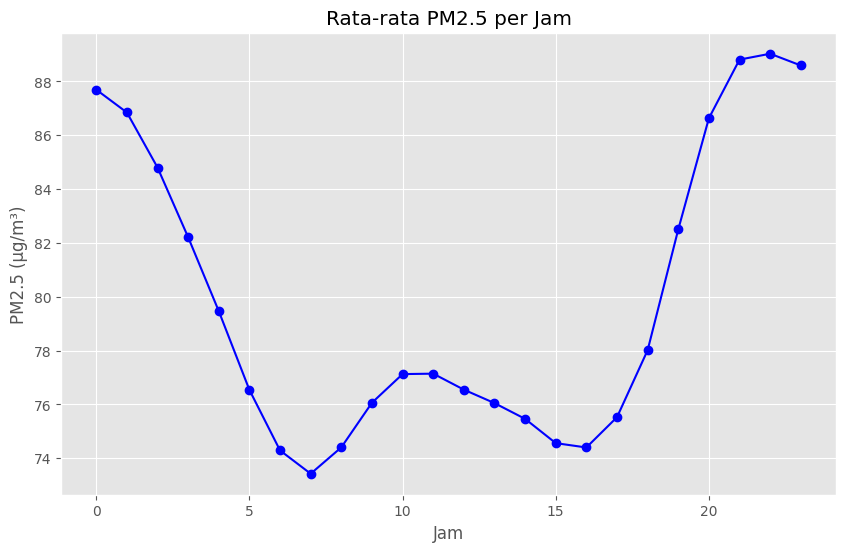

In [10]:
# Pola rata-rata PM2.5 per jam (ALL DATA)
hourly_means = filtered_df.groupby('hour')['PM2.5'].mean()
hourly_means.plot(kind='line', figsize=(10, 6), color='blue', marker='o')
plt.title('Rata-rata PM2.5 per Jam')
plt.xlabel('Jam')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()


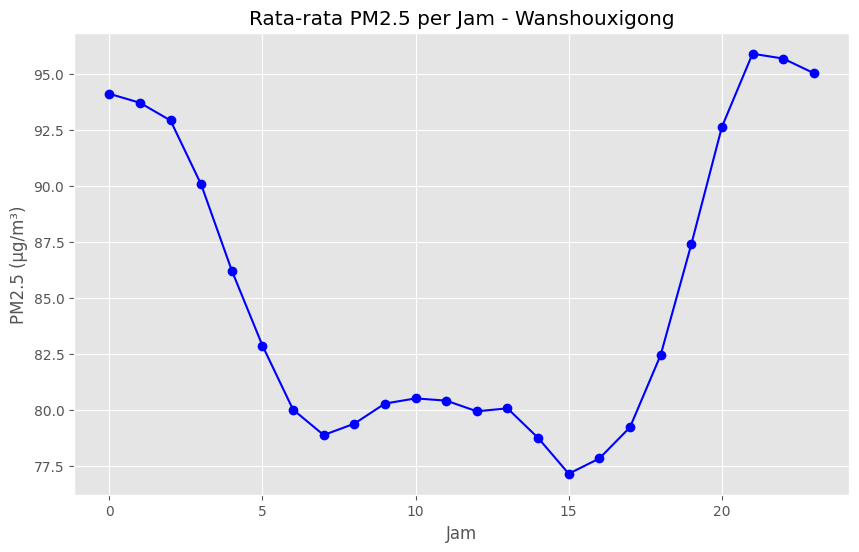

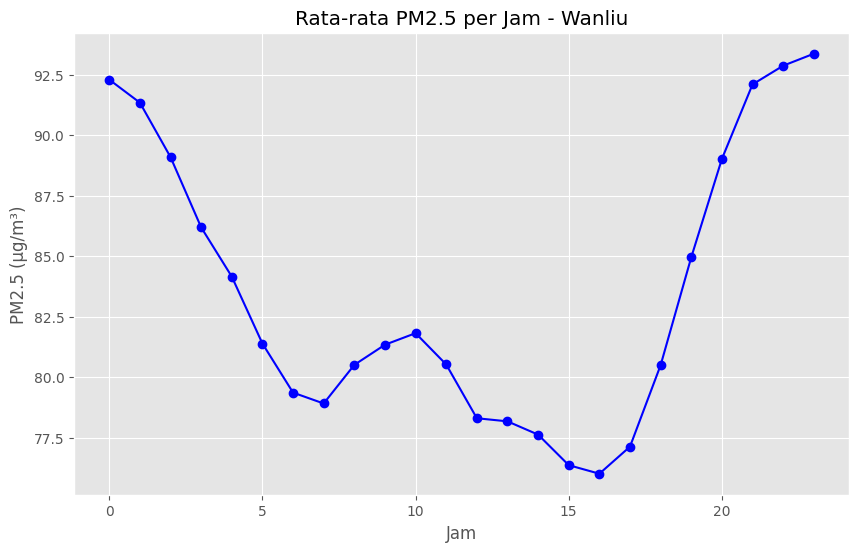

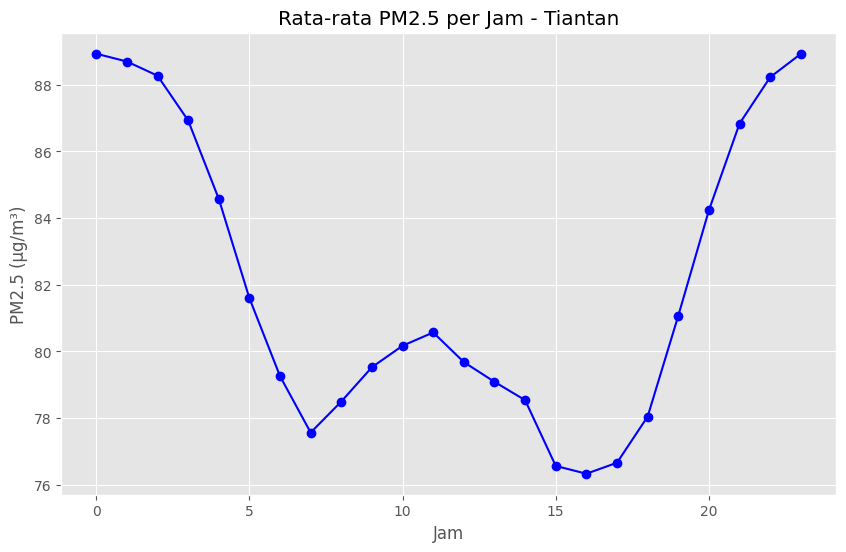

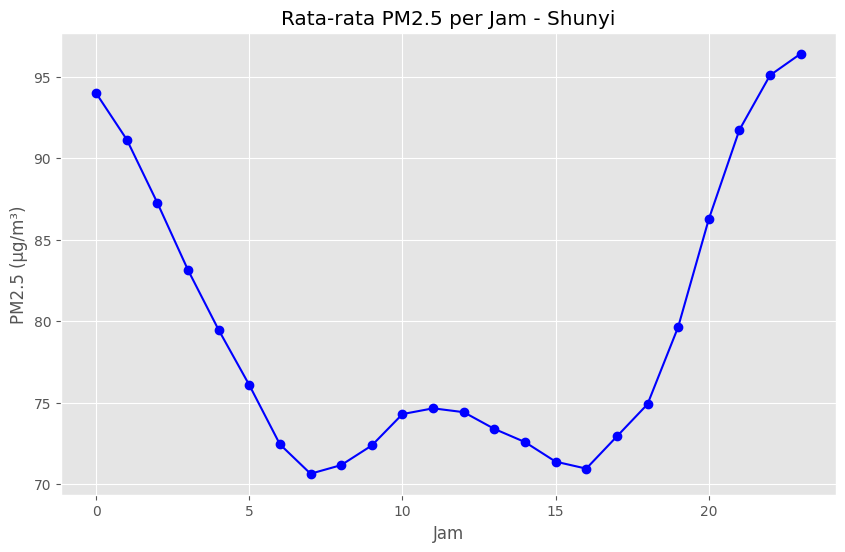

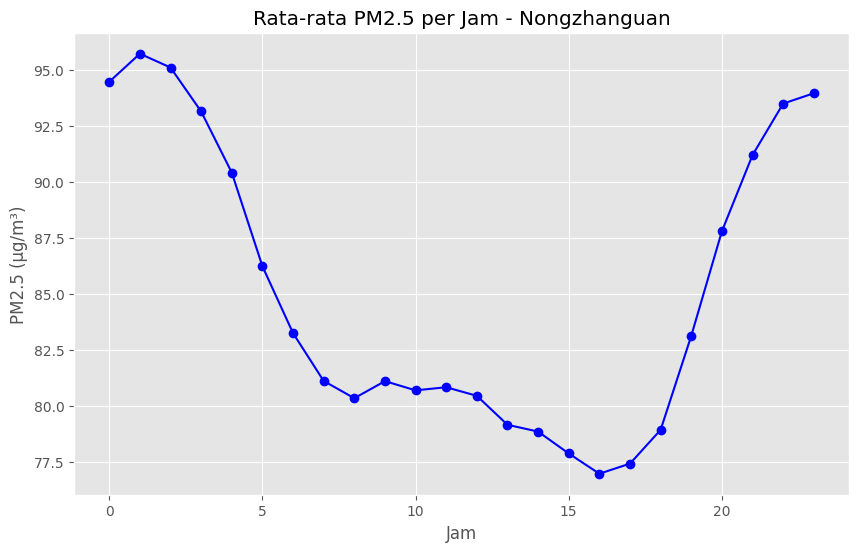

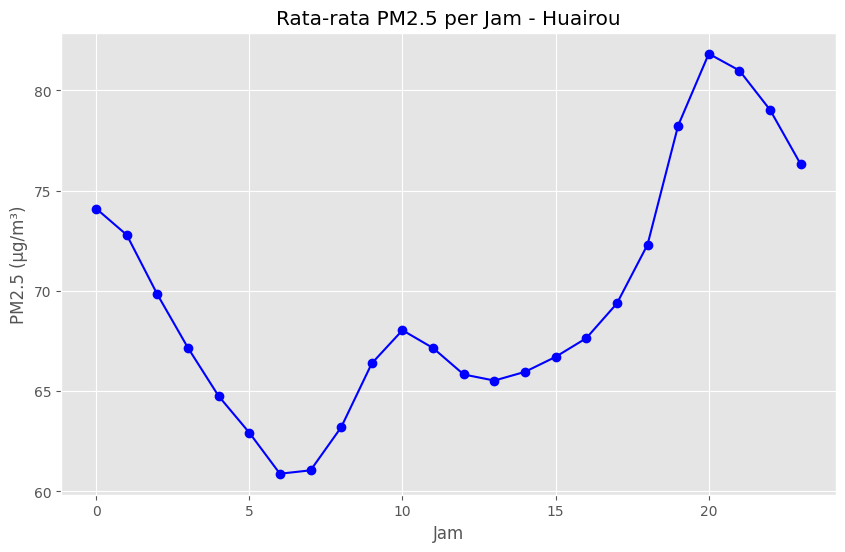

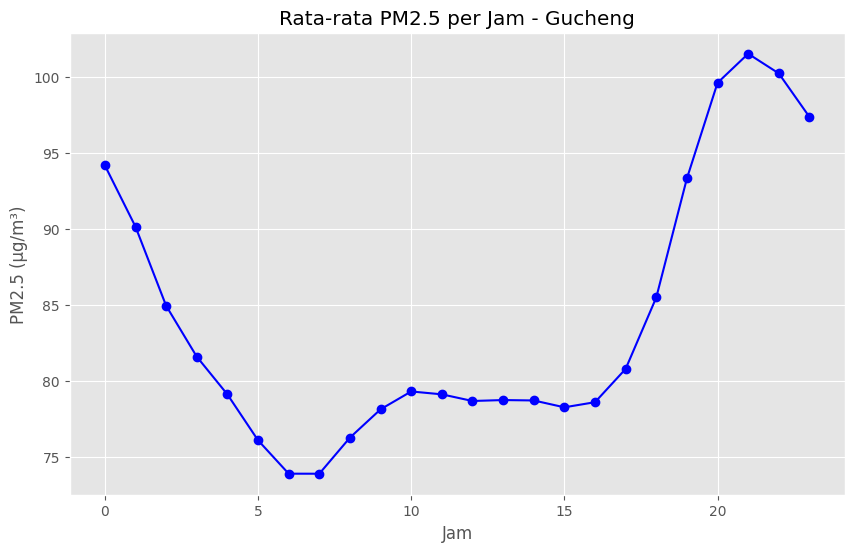

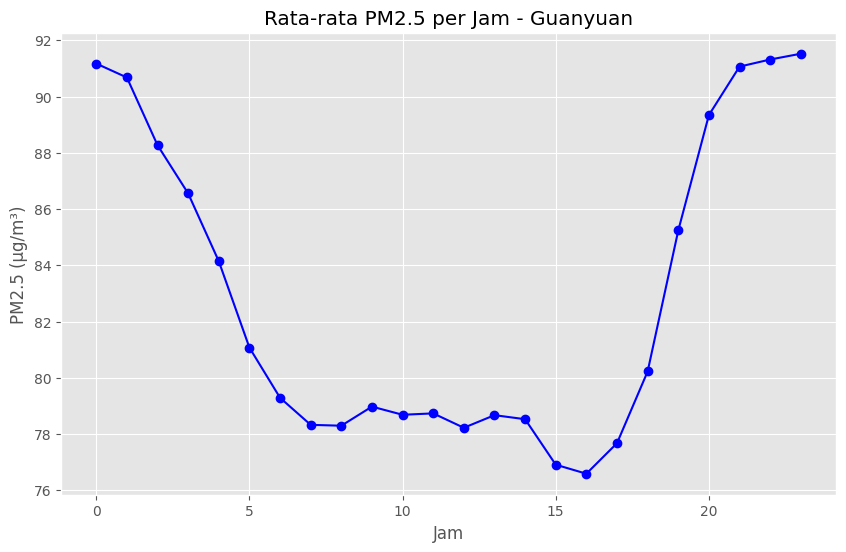

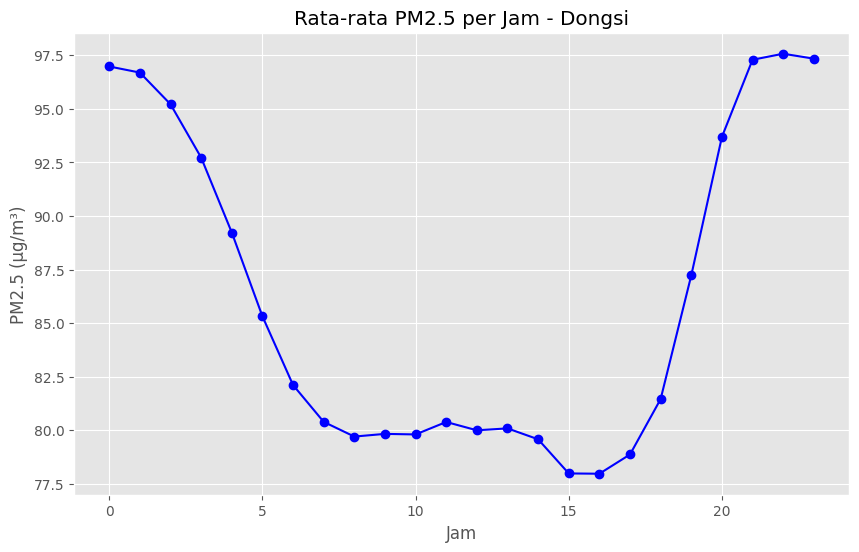

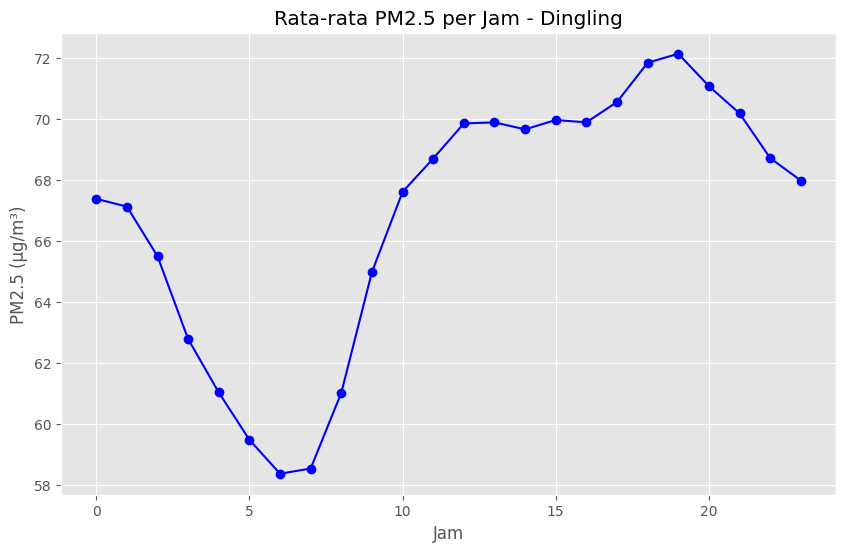

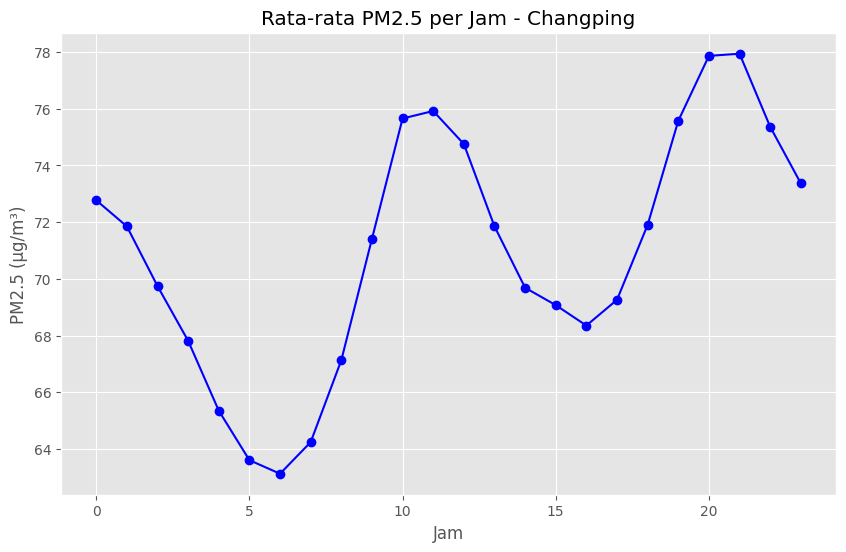

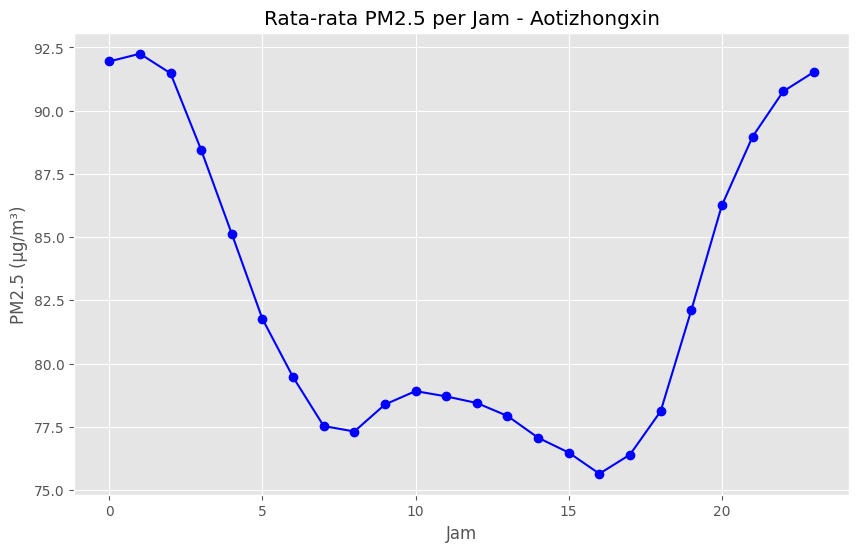

In [25]:
# Pola rata-rata PM2.5 per jam (Antar Stasiun)
# List semua stasiun
stations = df['station'].unique()

# Loop untuk setiap stasiun
for station in stations:
    # Filter data berdasarkan stasiun
    station_data = df[df['station'] == station]
    
    # Hitung rata-rata PM2.5 per jam
    hourly_means = station_data.groupby('hour')['PM2.5'].mean()
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(hourly_means.index, hourly_means.values, marker='o', color='blue')
    plt.title(f'Rata-rata PM2.5 per Jam - {station}')
    plt.xlabel('Jam')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.grid(True)
    plt.show()


**Insight:**
- Pola Harian/PerJam:
Konsentrasi PM2.5 tertinggi terjadi pada malam hingga dini hari (21:00–02:00). 
Hal ini mungkin disebabkan oleh stabilitas atmosfer yang memungkinkan akumulasi polutan.
Konsentrasi terendah terjadi pada siang hari (14:00–16:00)

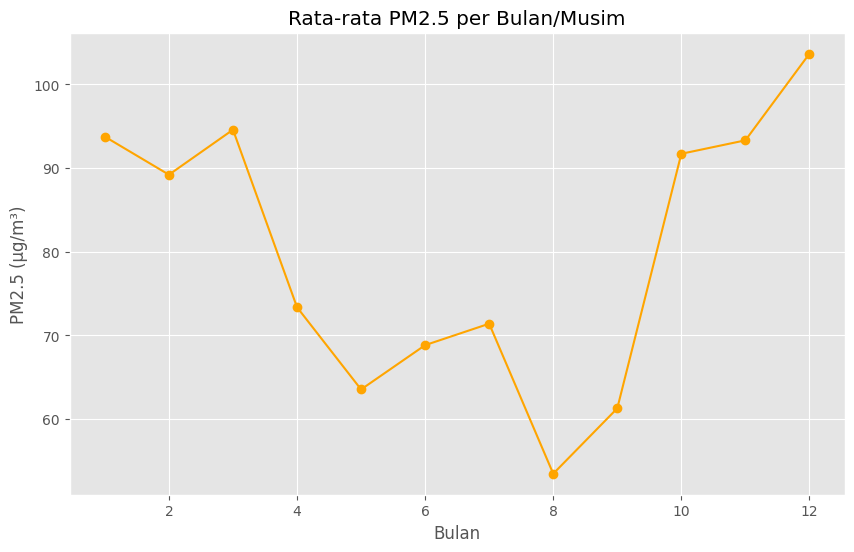

In [ ]:
# Pola rata-rata PM2.5 per bulan/musiman (All data)
monthly_means = df.groupby('month')['PM2.5'].mean()

monthly_means.plot(kind='line', figsize=(10, 6), color='orange', marker='o')
plt.title('Rata-rata PM2.5 per Bulan/Musim')
plt.xlabel('Bulan')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

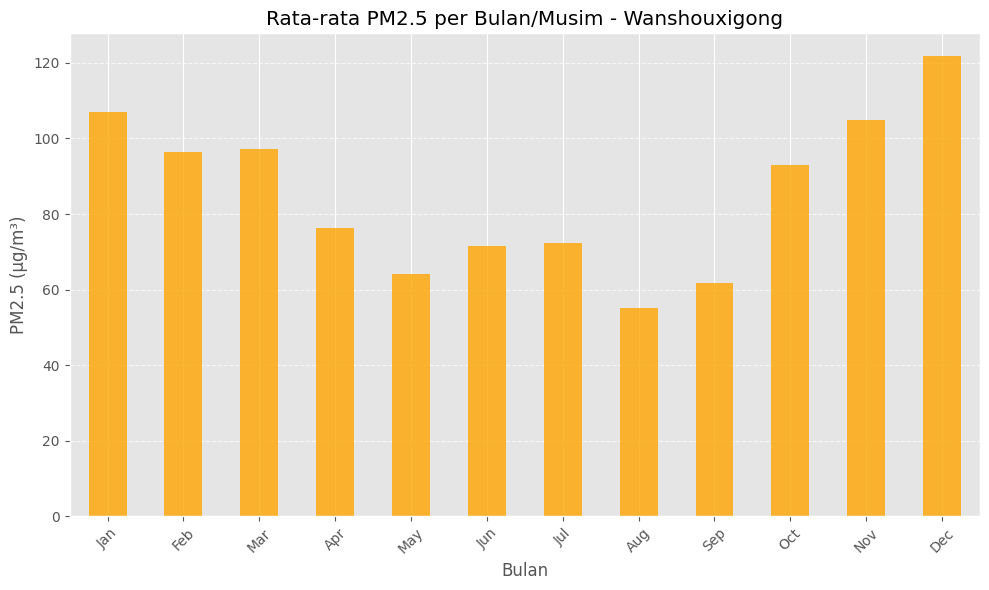

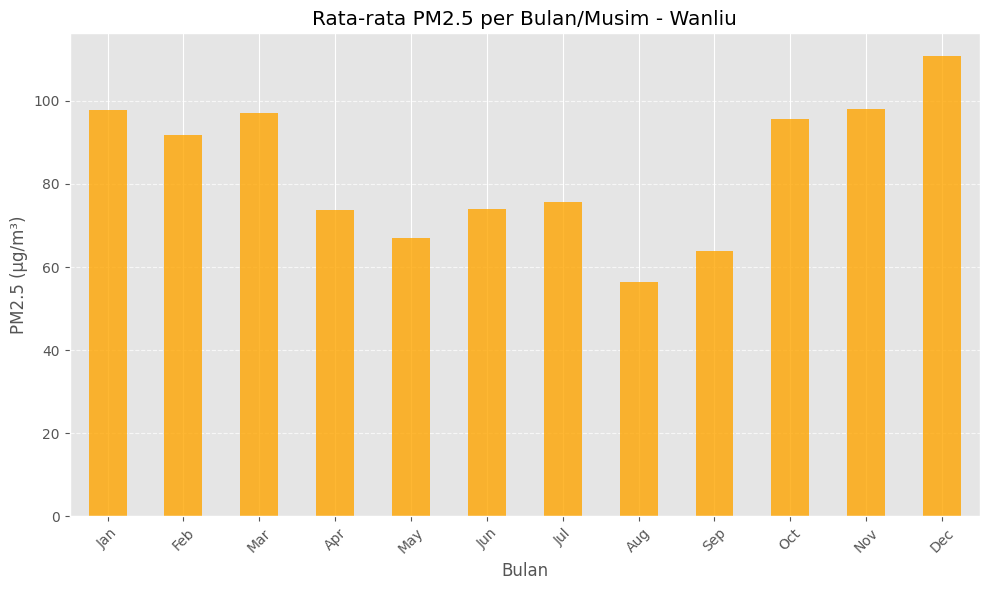

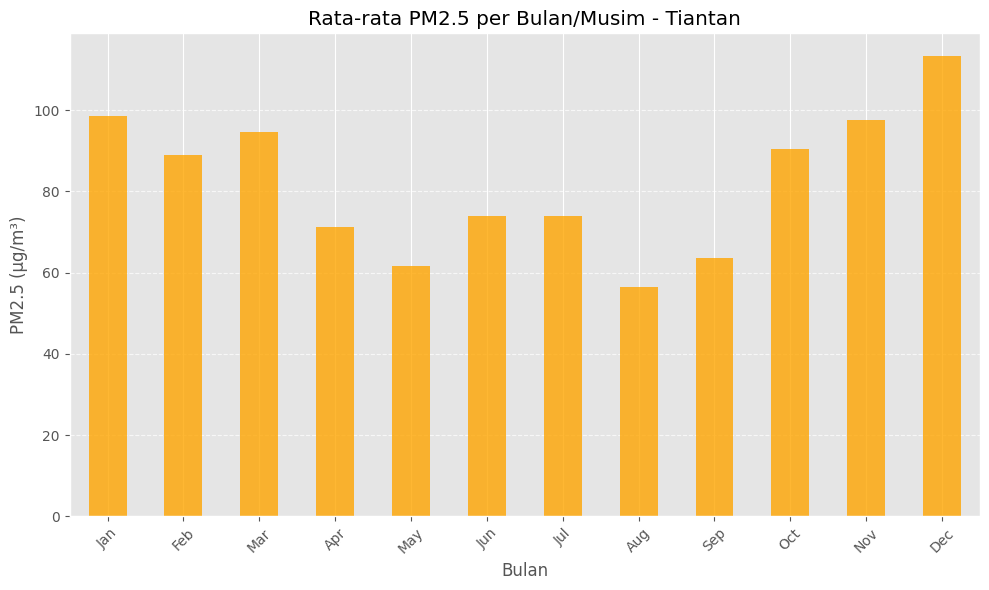

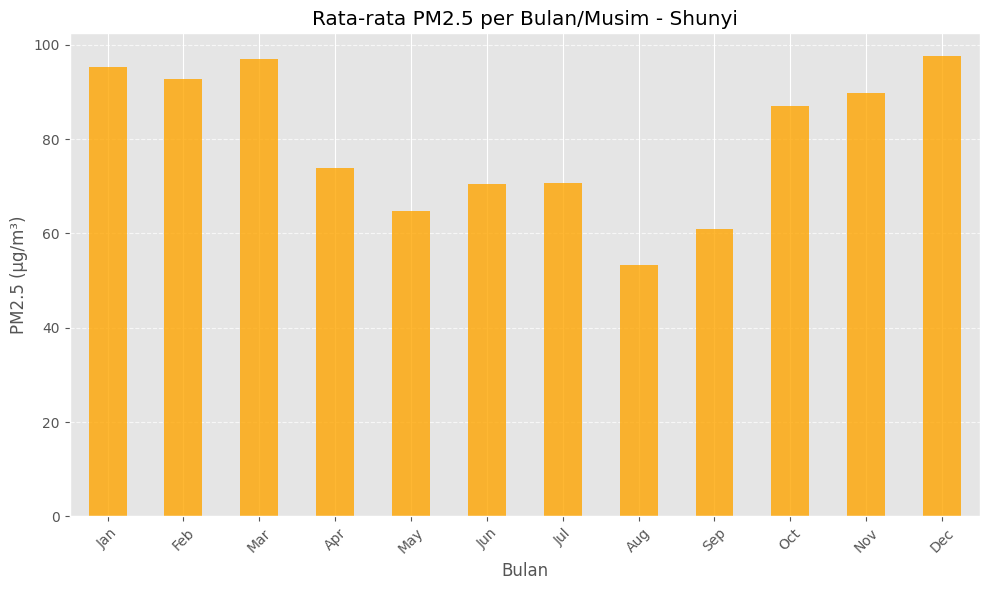

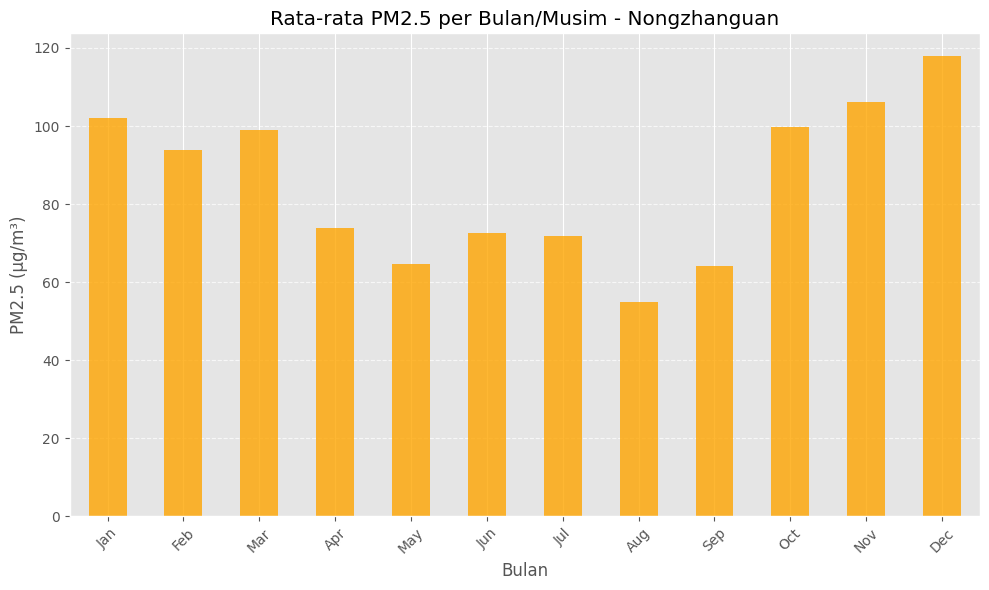

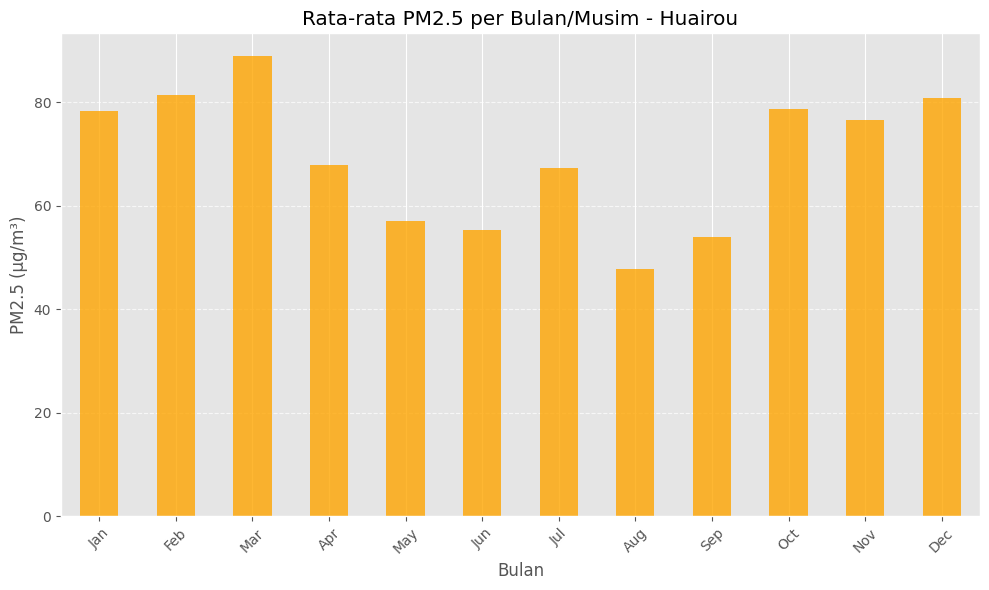

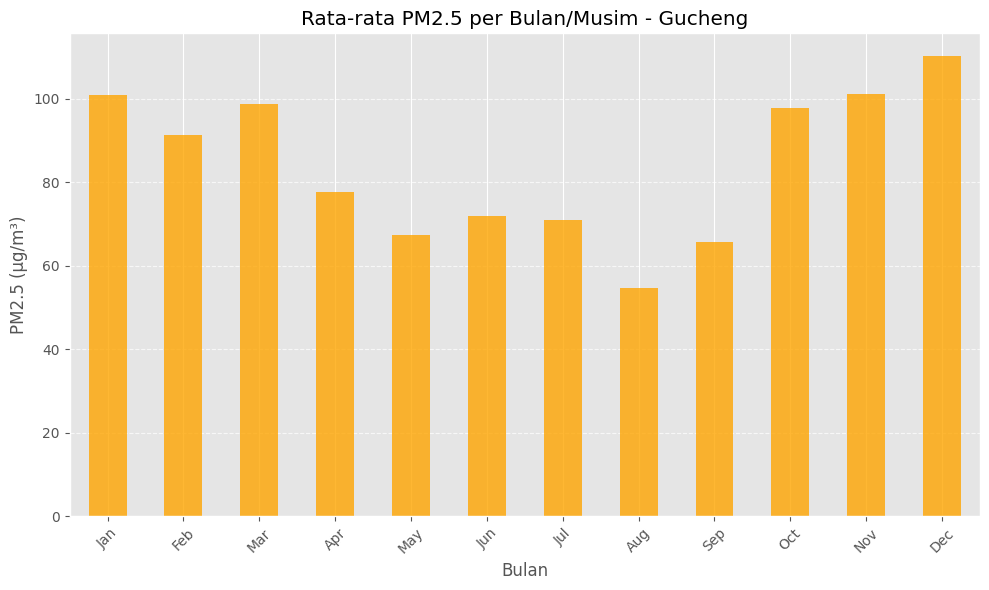

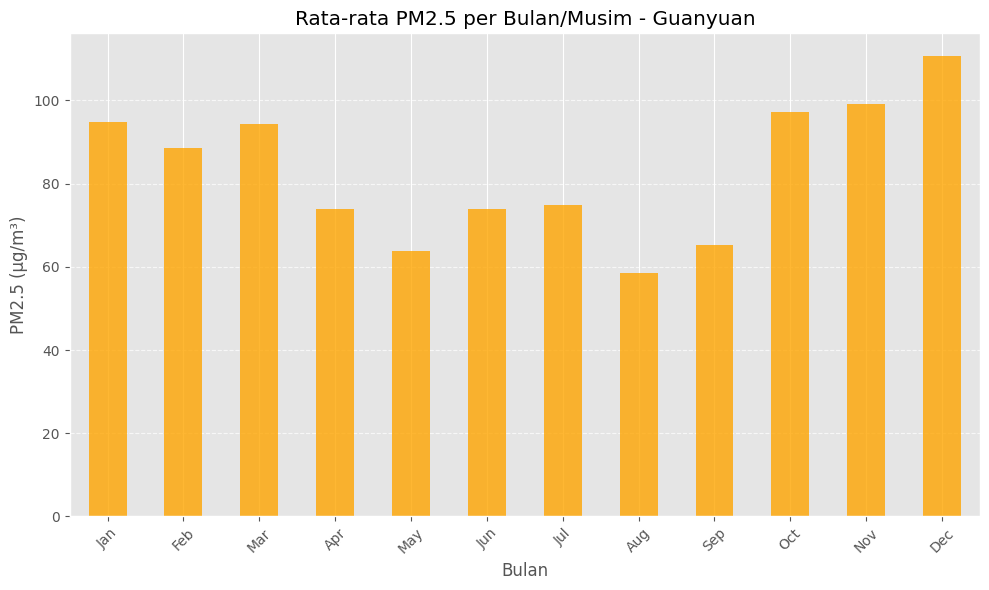

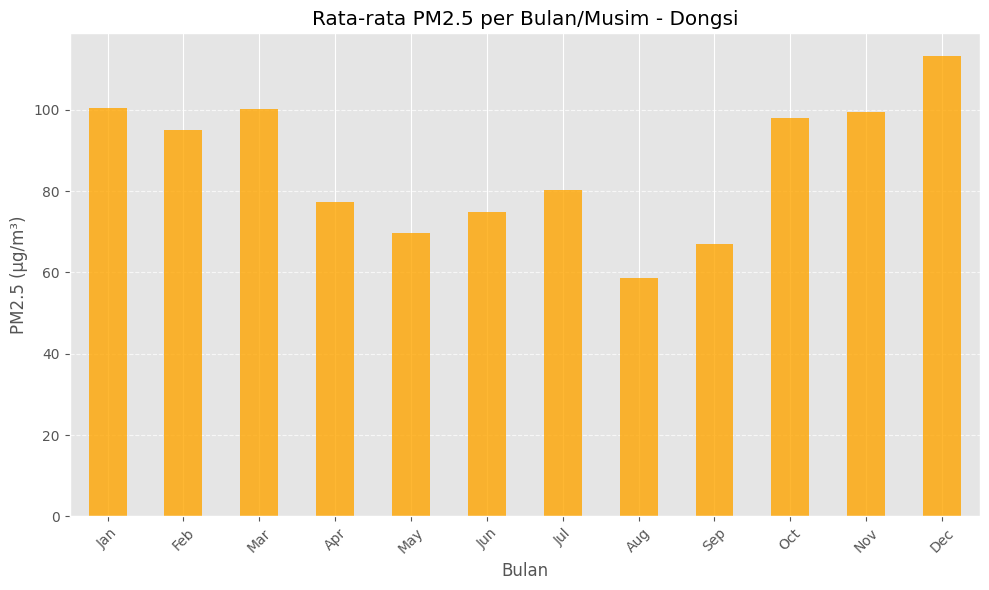

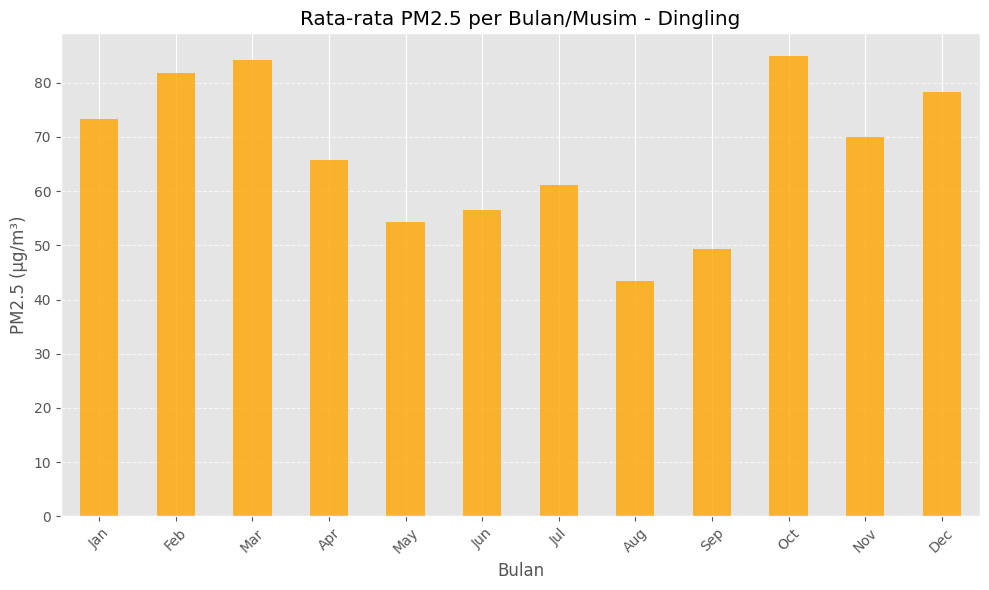

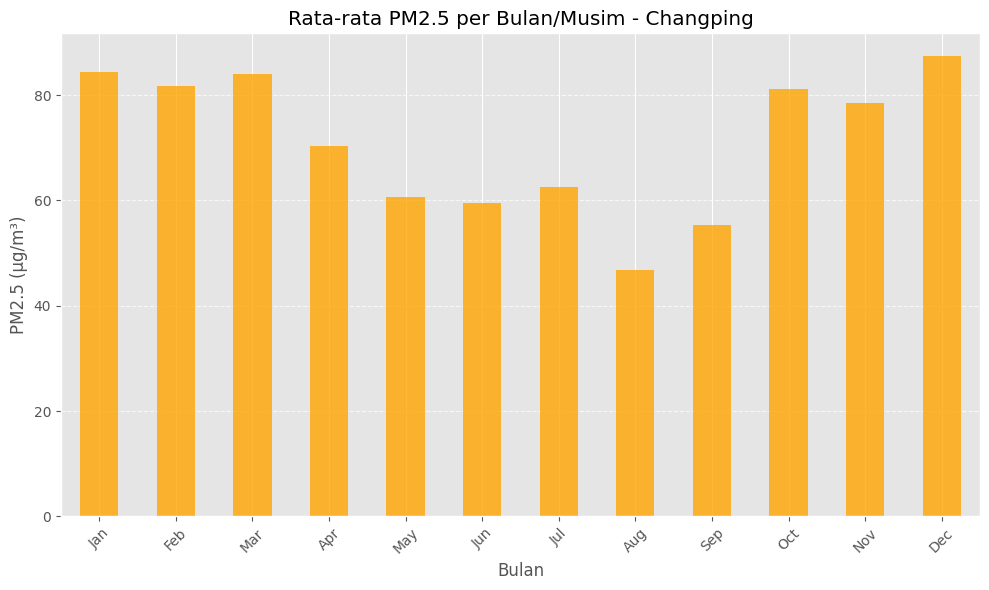

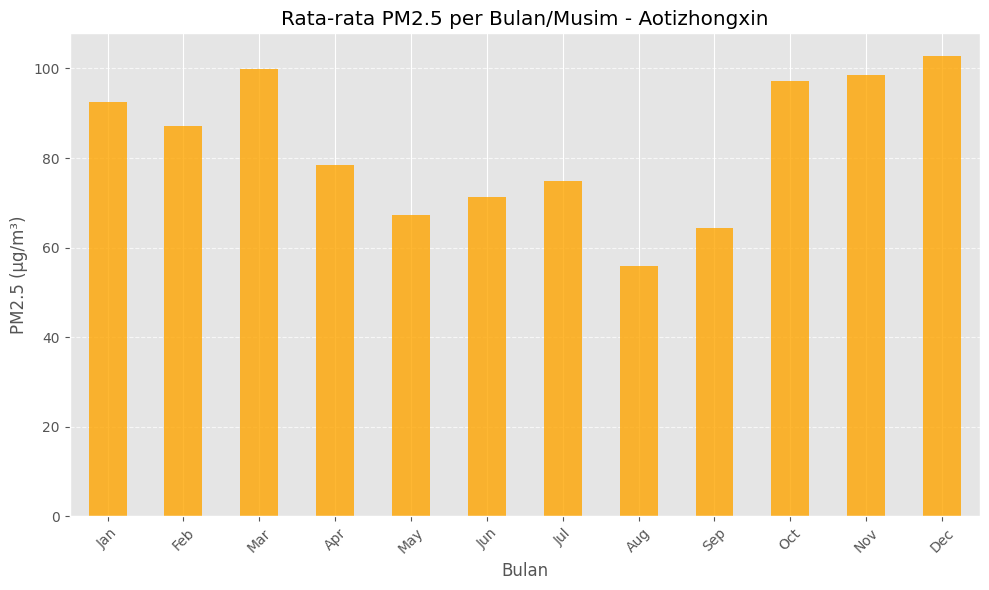

In [24]:
# Pola rata-rata PM2.5 per bulan/musiman (Antar Stasiun)
# List semua stasiun
stations = df['station'].unique()

# Loop untuk setiap stasiun
for station in stations:
    # Filter data berdasarkan stasiun
    station_data = df[df['station'] == station]
    
    # Hitung rata-rata PM2.5 per bulan
    monthly_means = station_data.groupby('month')['PM2.5'].mean()
    
    # Plot bar chart
    plt.figure(figsize=(10, 6))
    monthly_means.plot(kind='bar', color='orange', alpha=0.8)
    plt.title(f'Rata-rata PM2.5 per Bulan/Musim - {station}')
    plt.xlabel('Bulan')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.xticks(ticks=range(12), labels=[
        "Jan", "Feb", "Mar", "Apr", "May", "Jun",
        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ], rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


**Insight:**

- Pola Bulanan/Musiman:
    - Konsentrasi PM2.5 tertinggi terjadi pada musim dingin (Desember–Februari), kemungkinan akibat peningkatan pembakaran bahan bakar untuk pemanas didukung (sumber https://www.iqair.com/id/newsroom/black-carbon).
    - Konsentrasi terendah terjadi pada musim panas (Juli–September), saat hujan dan angin membantu membersihkan atmosfer dari polutan.

### Pertanyaan 2: Apa pengaruh cuaca (suhu, kelembapan, kecepatan angin) terhadap tingkat polutan tertentu?

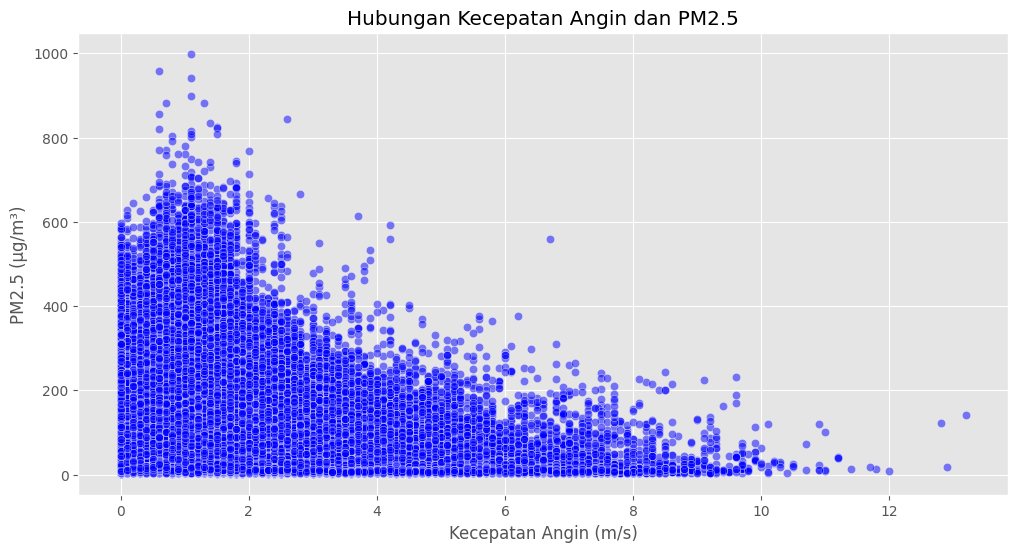

In [ ]:
# Hubungan PM2.5 dan Kecepatan Angin (ALL DATA)

sns.scatterplot(data=df, x='WSPM', y='PM2.5', alpha=0.5, color='blue')
plt.title('Hubungan Kecepatan Angin dan PM2.5')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

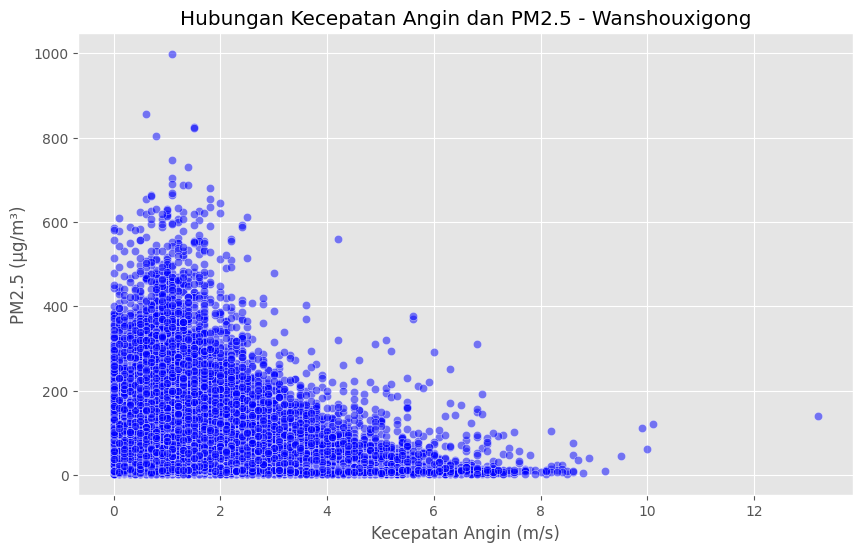

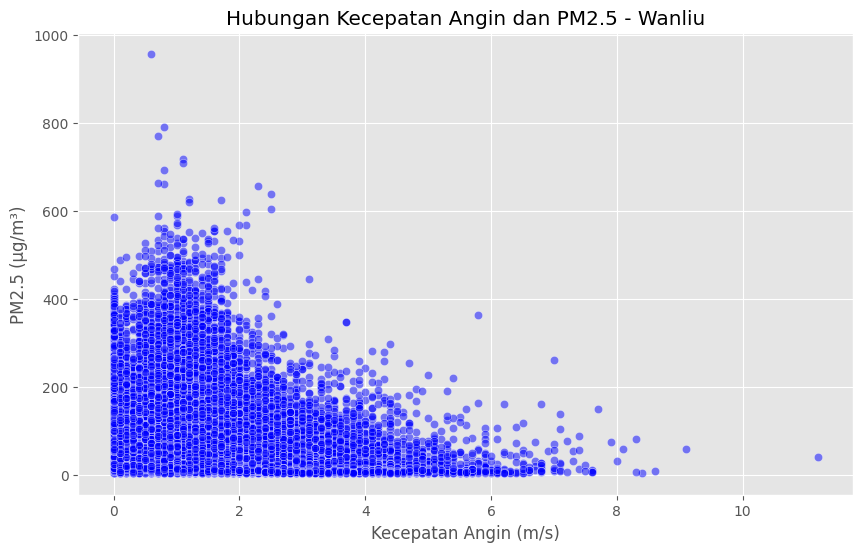

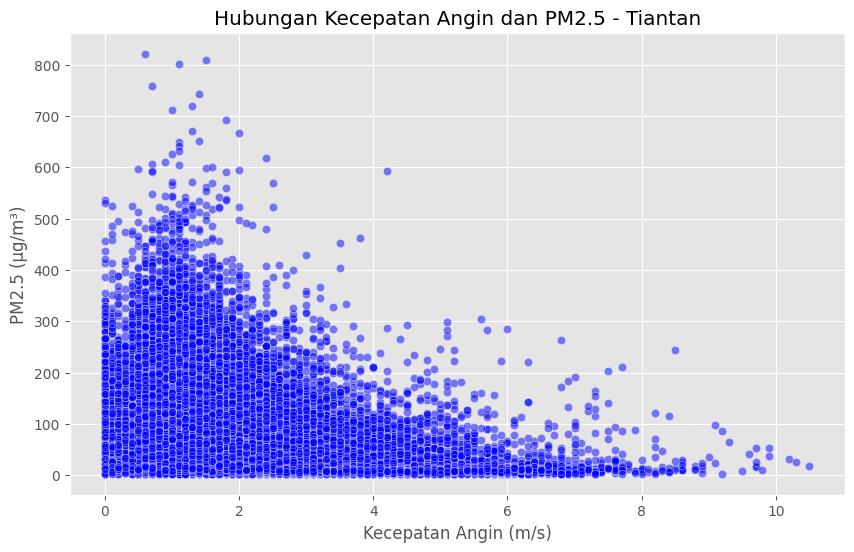

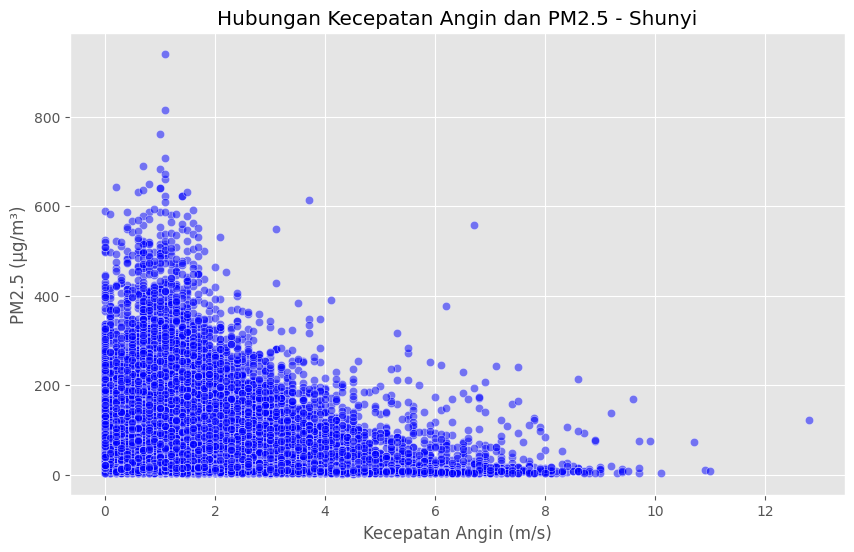

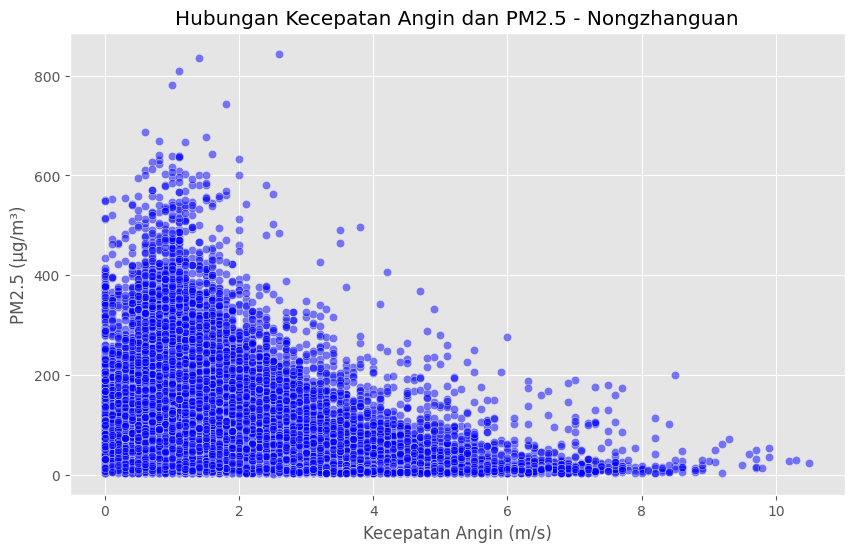

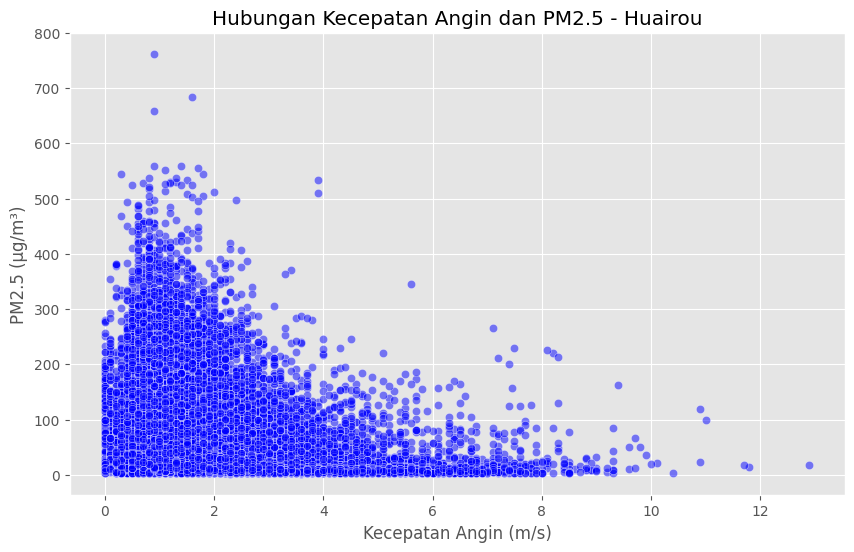

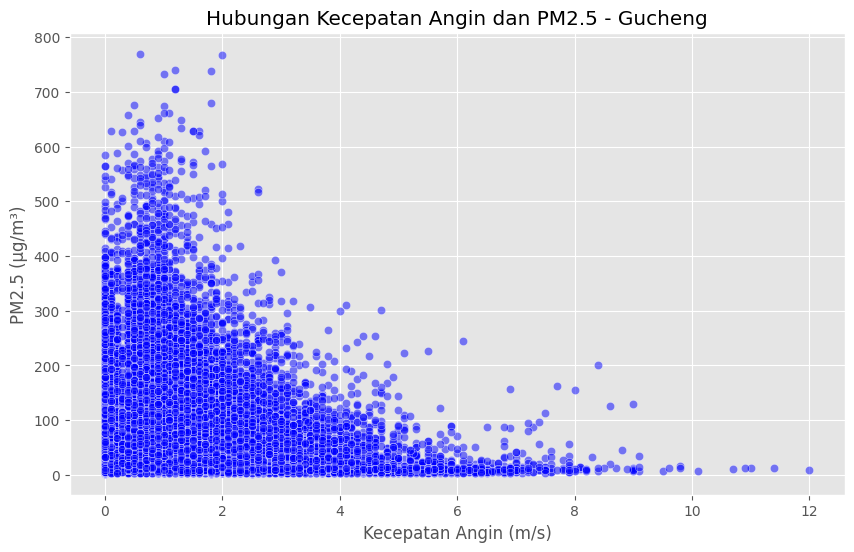

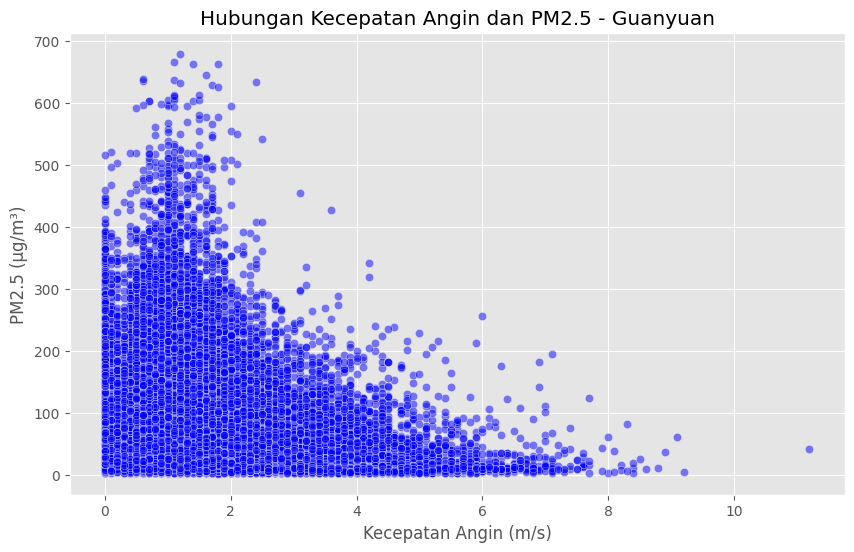

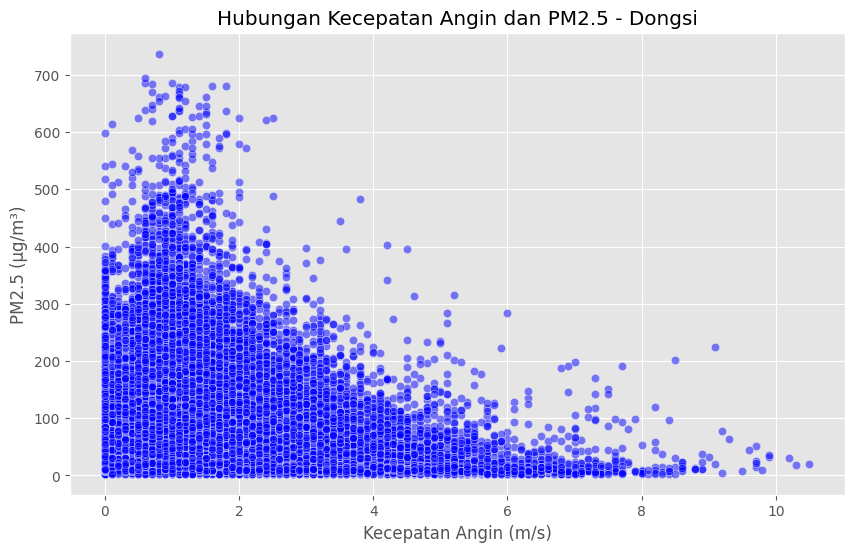

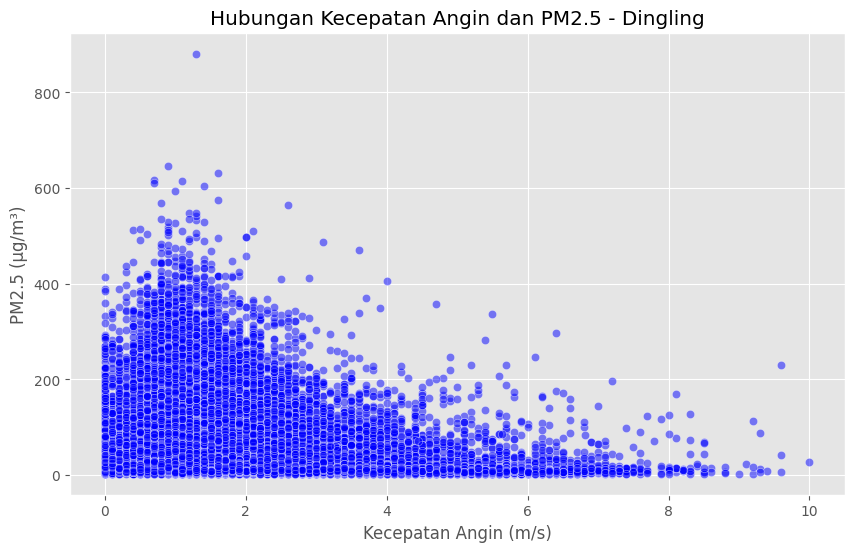

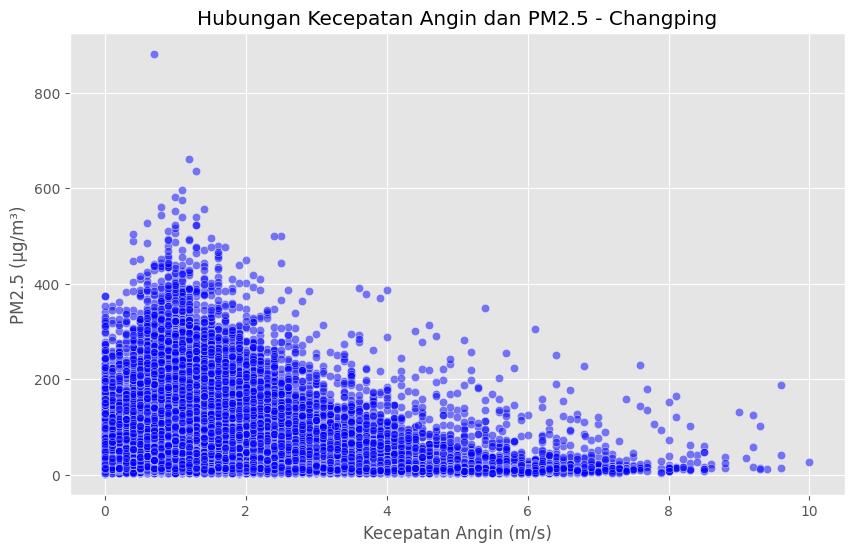

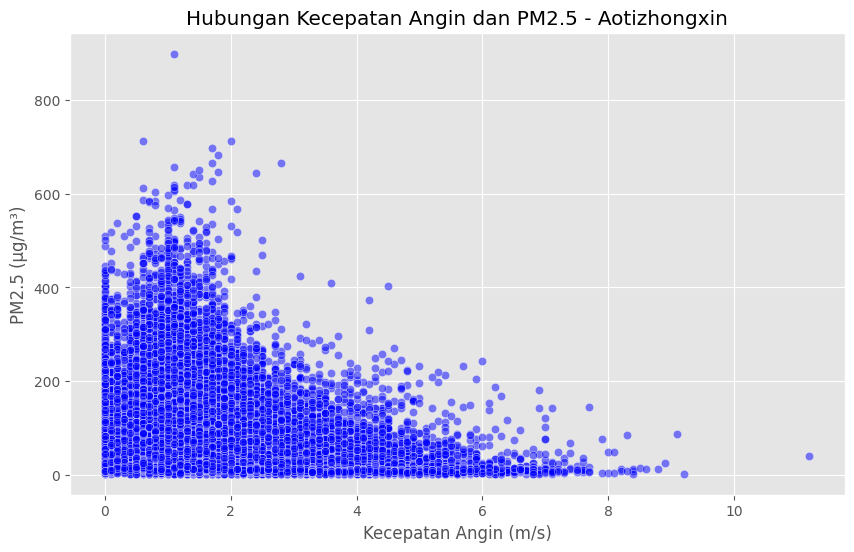

In [15]:
# List semua stasiun
stations = df['station'].unique()

# Loop untuk setiap stasiun
for station in stations:
    # Filter data berdasarkan stasiun
    station_data = df[df['station'] == station]
    
    # Scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=station_data, x='WSPM', y='PM2.5', alpha=0.5, color='blue')
    plt.title(f'Hubungan Kecepatan Angin dan PM2.5 - {station}')
    plt.xlabel('Kecepatan Angin (m/s)')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.grid(True)
    plt.show()

**Insight :** 

- Kecepatan angin rendah (0-2 m/s) berkorelasi dengan konsentrasi PM2.5 yang lebih tinggi karena polutan tidak tersebar dengan baik.
- Kecepatan angin yang lebih tinggi membantu menyebarkan polutan, menurunkan konsentrasi lokal.



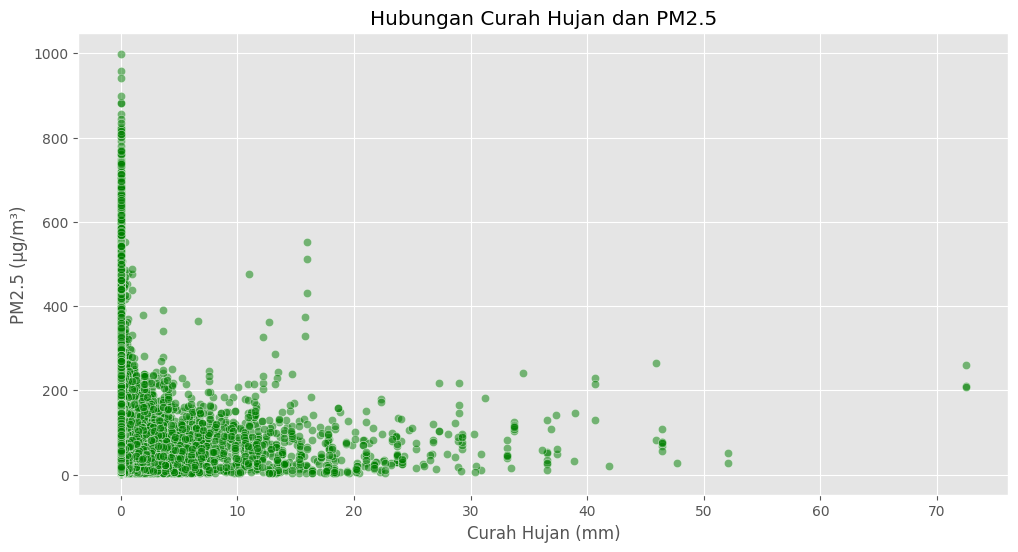

In [ ]:
# Hubungan PM2.5 dan Curah Hujan (All Data)
sns.scatterplot(data=df, x='RAIN', y='PM2.5', alpha=0.5, color='green')
plt.title('Hubungan Curah Hujan dan PM2.5')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()


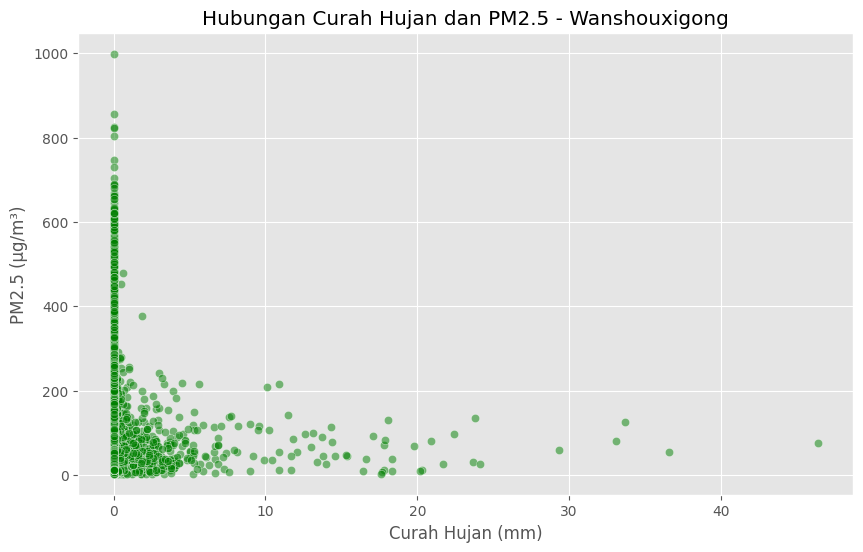

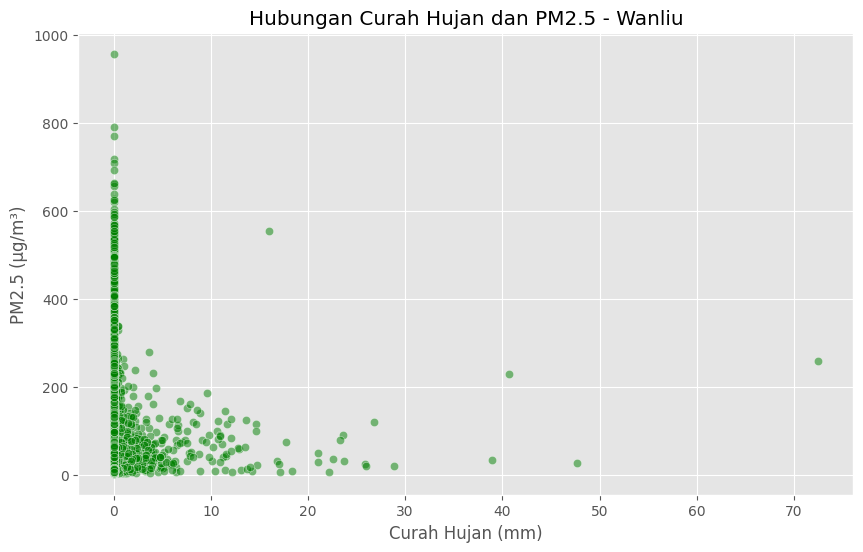

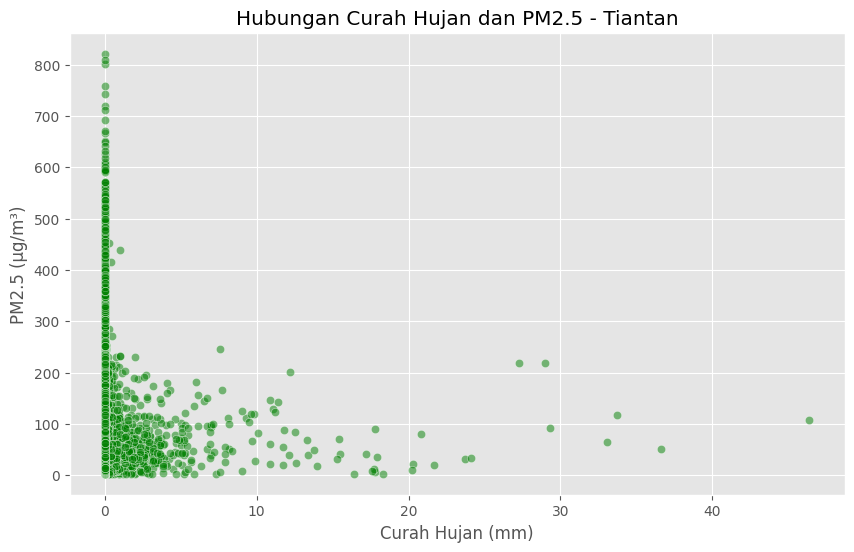

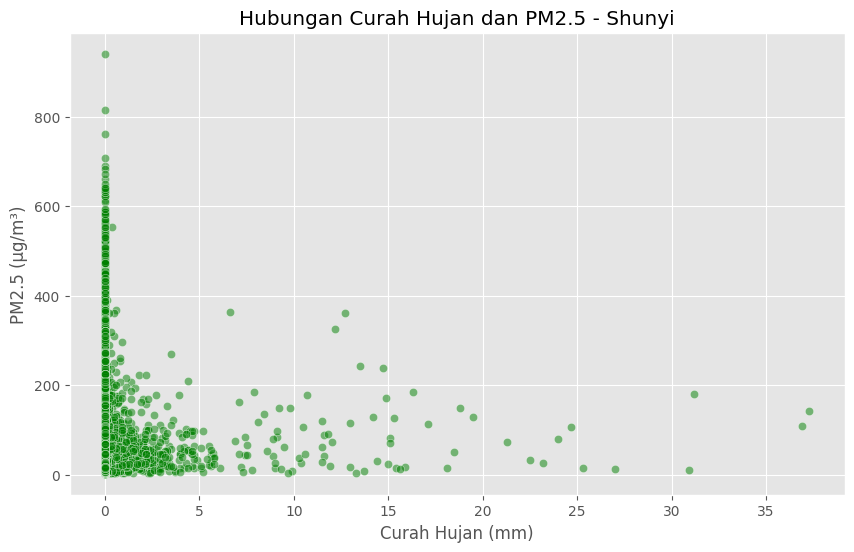

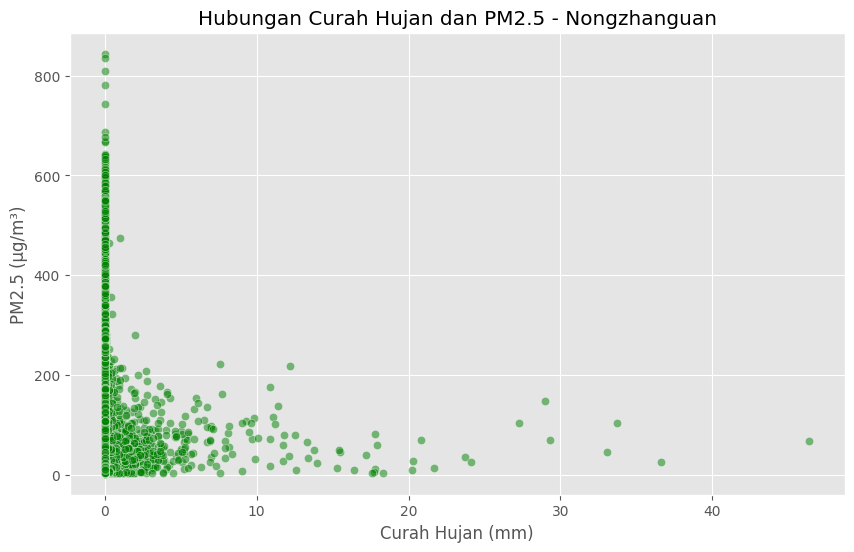

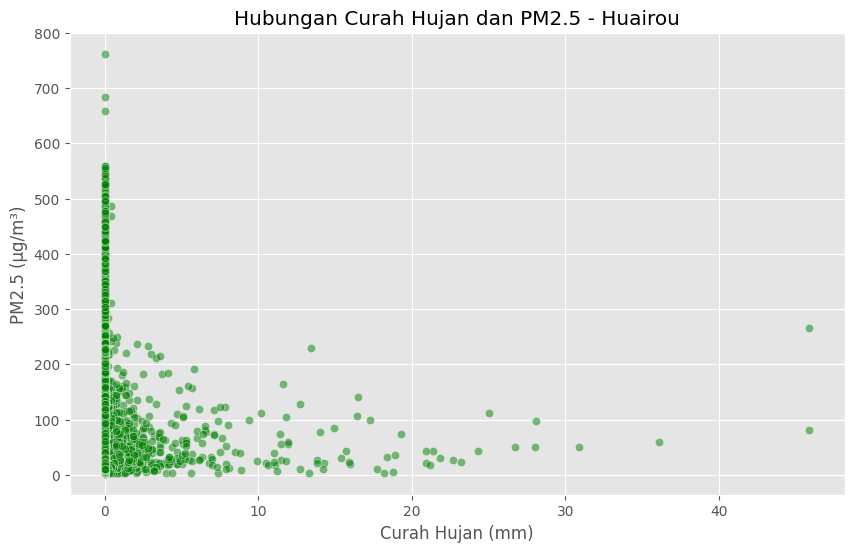

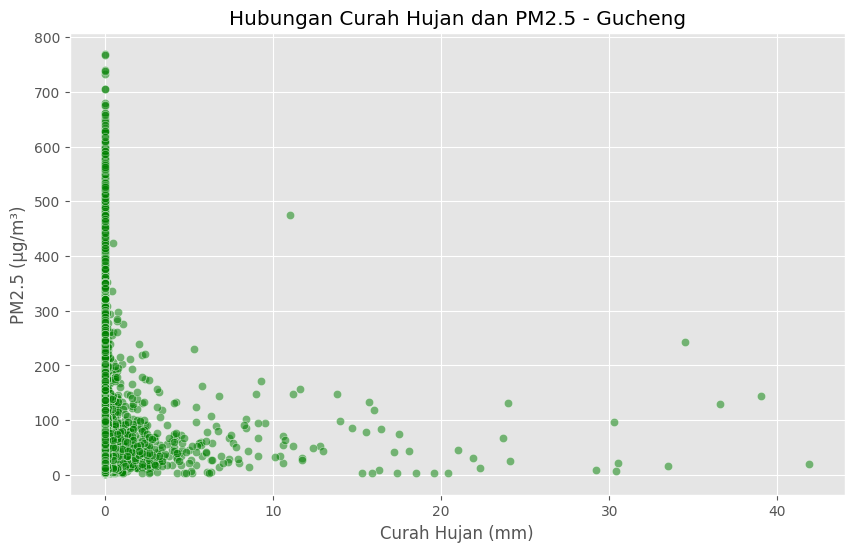

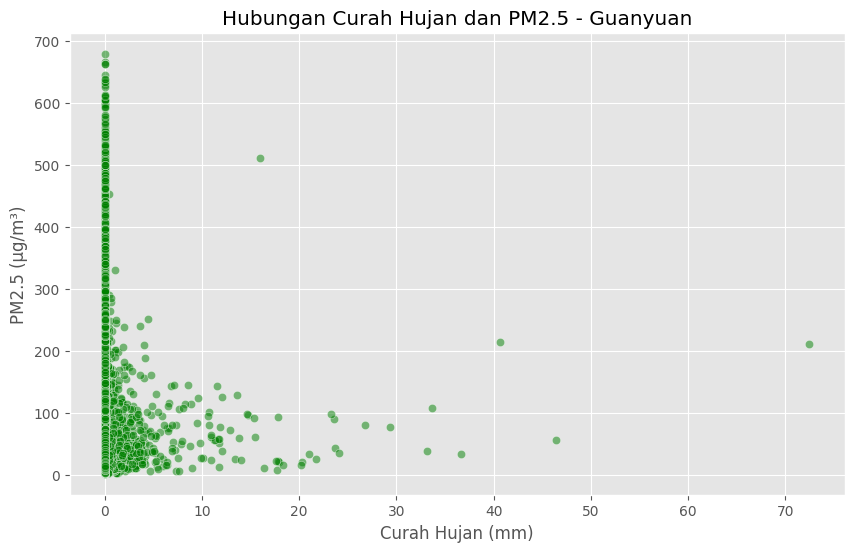

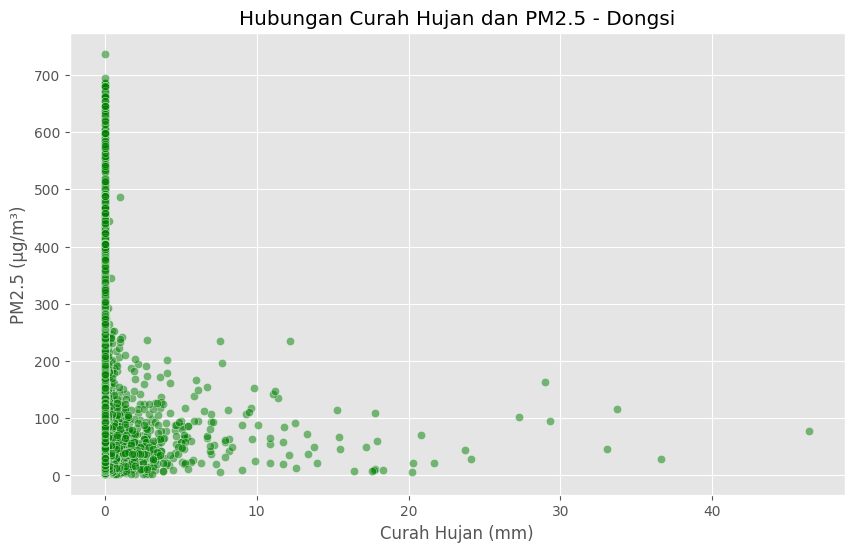

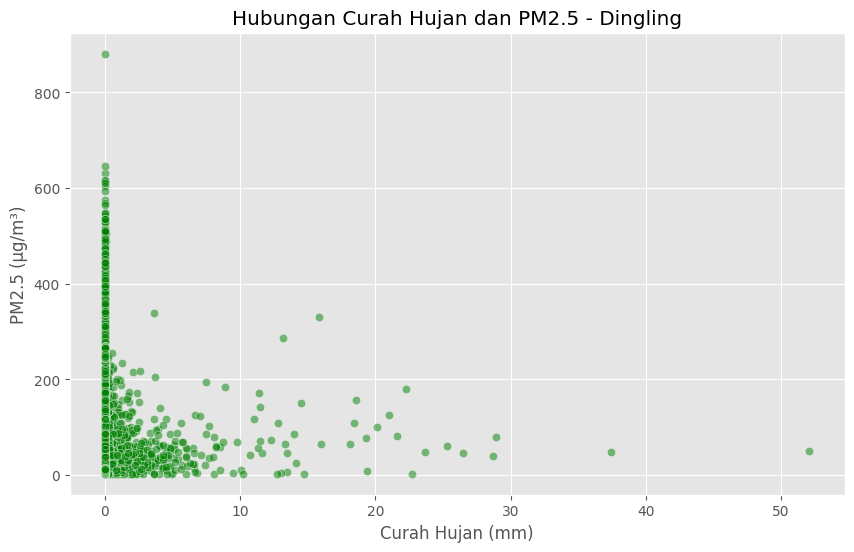

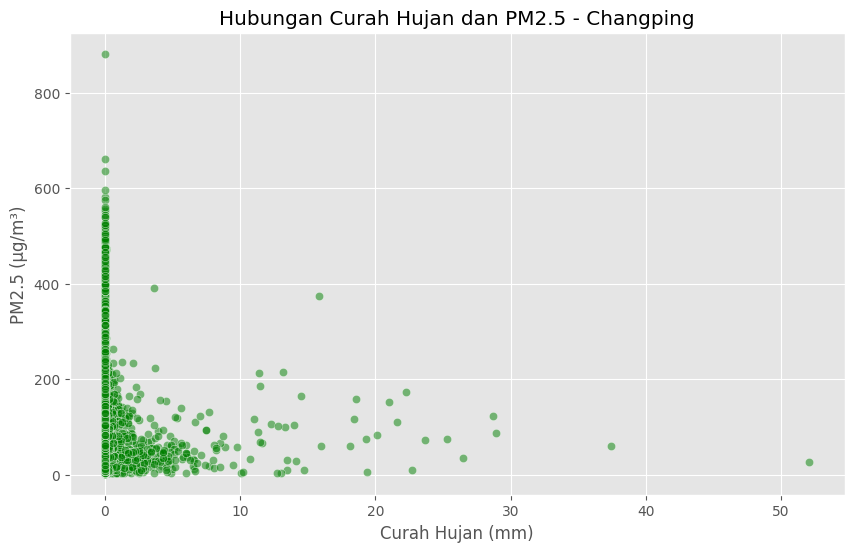

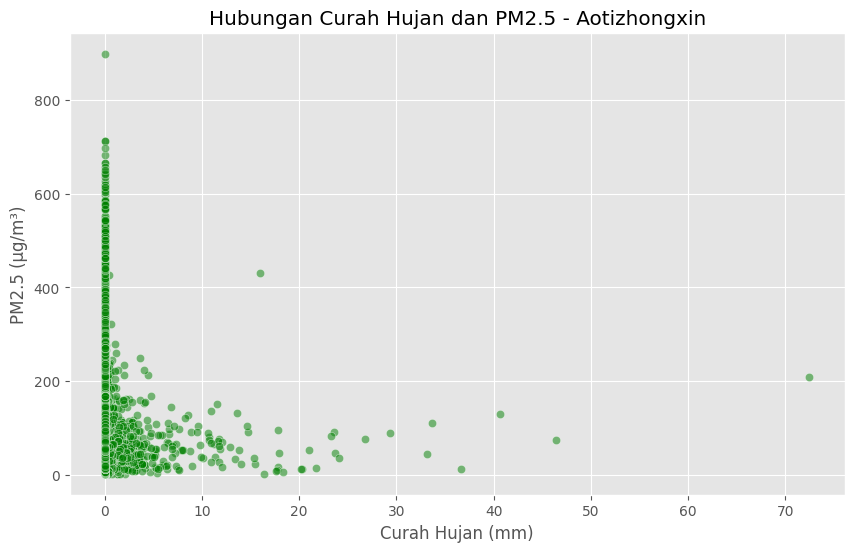

In [23]:
# Hubungan PM2.5 dan Curah Hujan (Antar Stasiun)
# List semua stasiun
stations = df['station'].unique()

# Loop untuk setiap stasiun
for station in stations:
    # Filter data berdasarkan stasiun
    station_data = df[df['station'] == station]
    
    # Scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=station_data, x='RAIN', y='PM2.5', alpha=0.5, color='green')
    plt.title(f'Hubungan Curah Hujan dan PM2.5 - {station}')
    plt.xlabel('Curah Hujan (mm)')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.grid(True)
    plt.show()


**Insight :** 

- Curah hujan tinggi membantu mengurangi konsentrasi PM2.5 melalui proses wet deposition (partikel polutan tersapu oleh air hujan).
- Hujan menjadi faktor penting dalam membersihkan PM2.5.

### Pertanyaan 3: Bagaimana kualitas udara bervariasi antar stasiun pengukuran di kota?

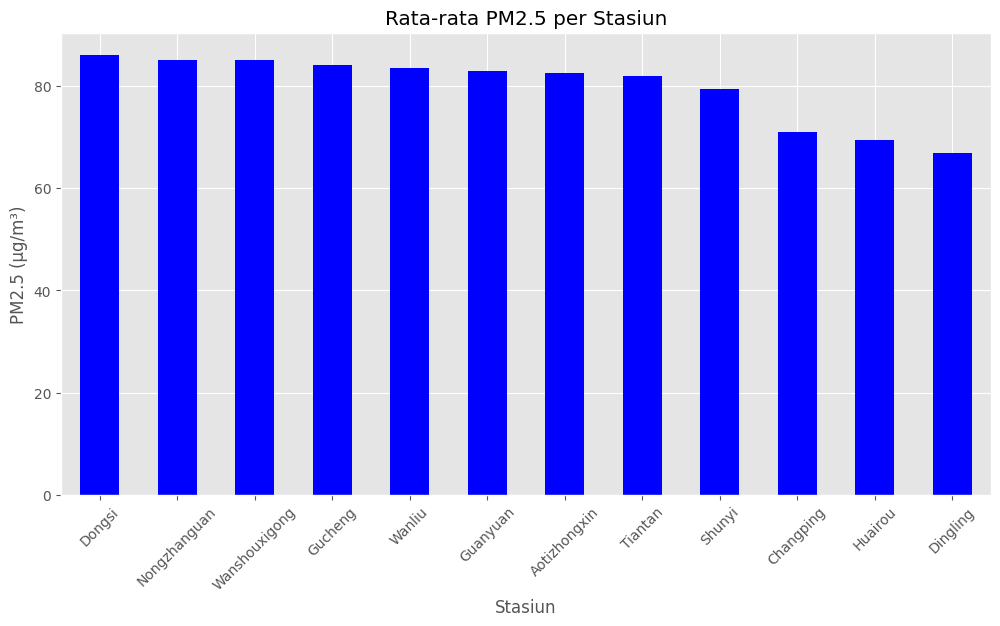

In [18]:
# Rata-rata PM2.5 per Stasiun
station_means = filtered_df.groupby('station')['PM2.5'].mean()

# Plot bar chart
station_means.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='blue')
plt.title('Rata-rata PM2.5 per Stasiun')
plt.ylabel('PM2.5 (µg/m³)')
plt.xlabel('Stasiun')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Insight:**

- Variasi Antar Stasiun:
    - Stasiun di pusat kota atau dekat kawasan industri memiliki konsentrasi PM2.5 yang lebih tinggi.
    - Stasiun di daerah pedesaan atau jauh dari aktivitas manusia mencatat konsentrasi yang lebih rendah.


### Pertanyaan 4: Apa hubungan antara PM2.5 dengan parameter polutan lainnya seperti SO2, NO2, dan CO?

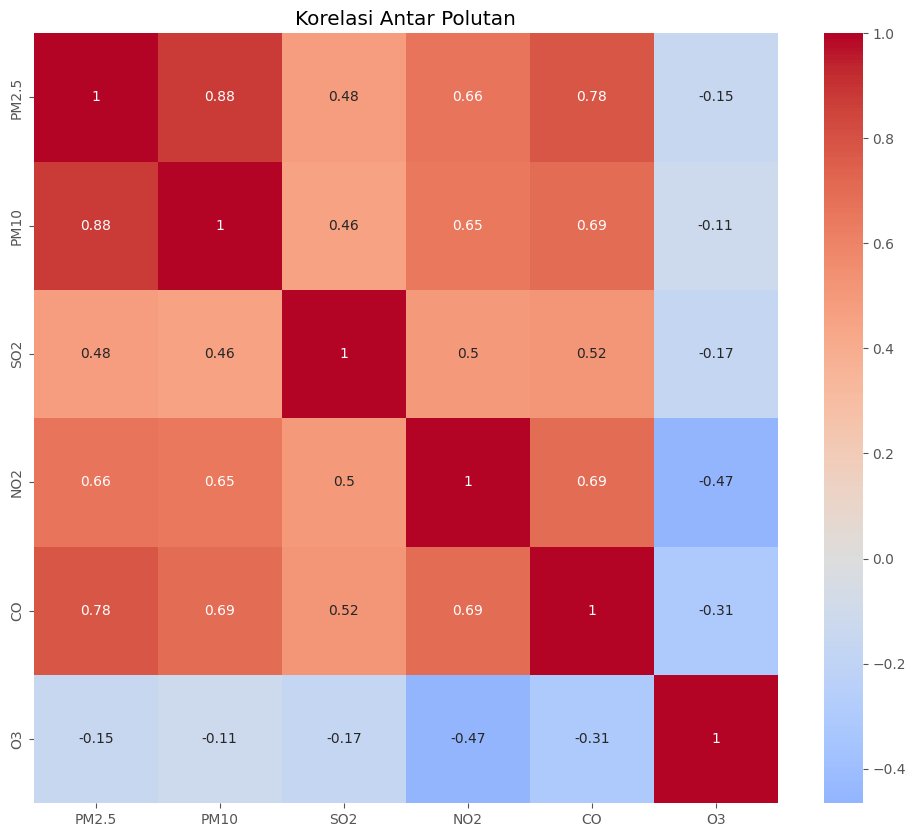

In [19]:
#Korelasi Antar-Polutan
plt.figure(figsize=(12, 10))
sns.heatmap(df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi Antar Polutan')
plt.show()


**Insight:**

- Korelasi Antar-Polutan:
    - PM2.5 memiliki korelasi positif yang sangat kuat dengan PM10, SO2, dan NO2, menunjukkan kemungkinan berasal dari aktivitas pembakaran bahan bakar fosil.
    - Korelasi negatif antara PM2.5 dan O3, menunjukkan bahwa kondisi atmosfer yang mendukung pembentukan ozon tidak selalu mendukung akumulasi partikel PM2.5.

### Pertanyaan 5: Bagaimana tingkat hujan memengaruhi konsentrasi polutan?

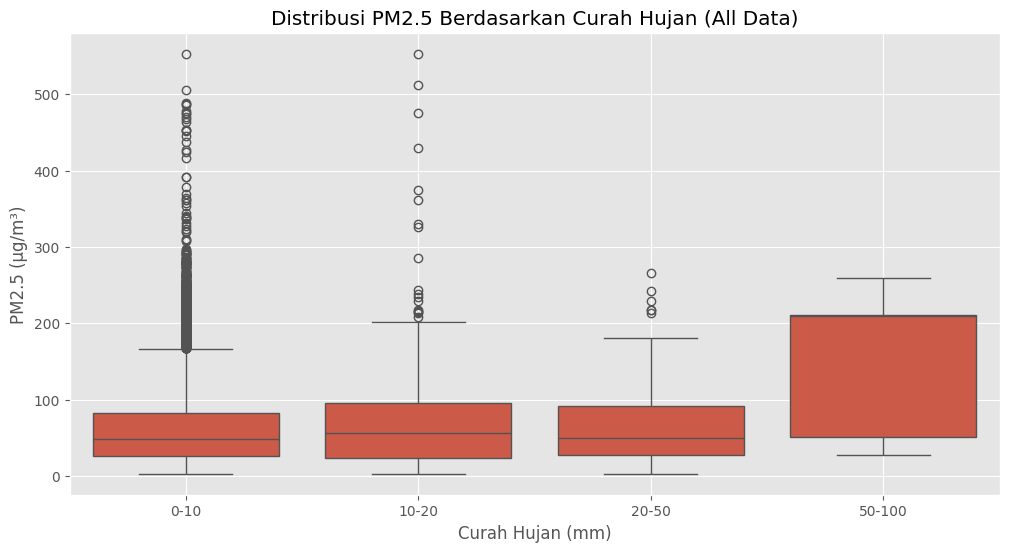

In [20]:
# Distribusi PM2.5 Berdasarkan Curah Hujan (All Data)
sns.boxplot(data=df, x=pd.cut(df['RAIN'], bins=[0, 10, 20, 50, 100], labels=['0-10', '10-20', '20-50', '50-100']), y='PM2.5')
plt.title('Distribusi PM2.5 Berdasarkan Curah Hujan (All Data)')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.show()


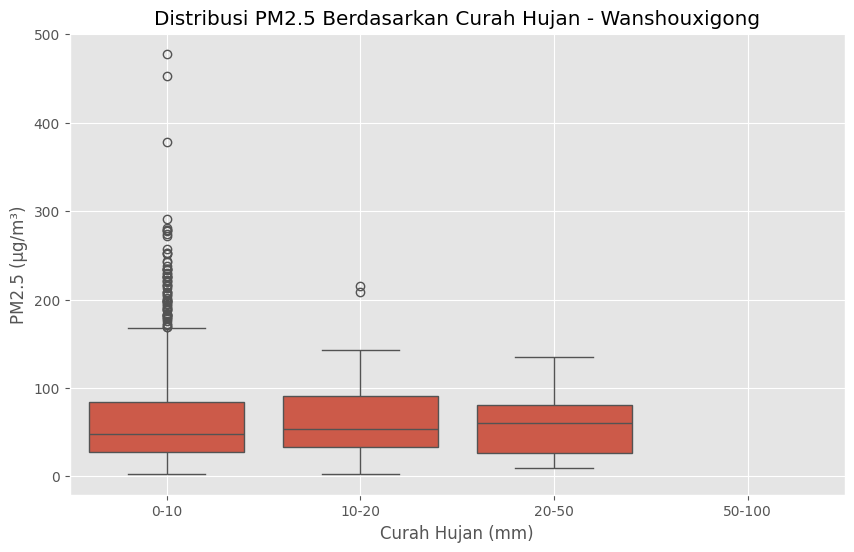

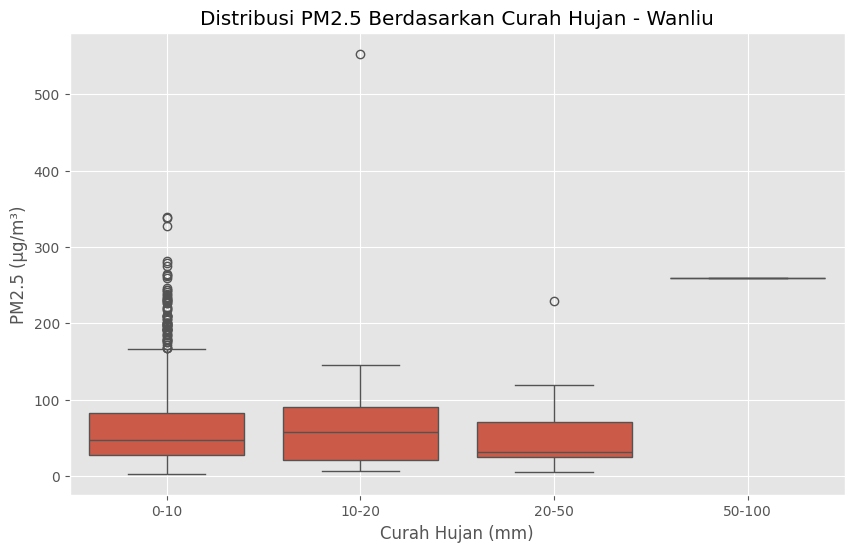

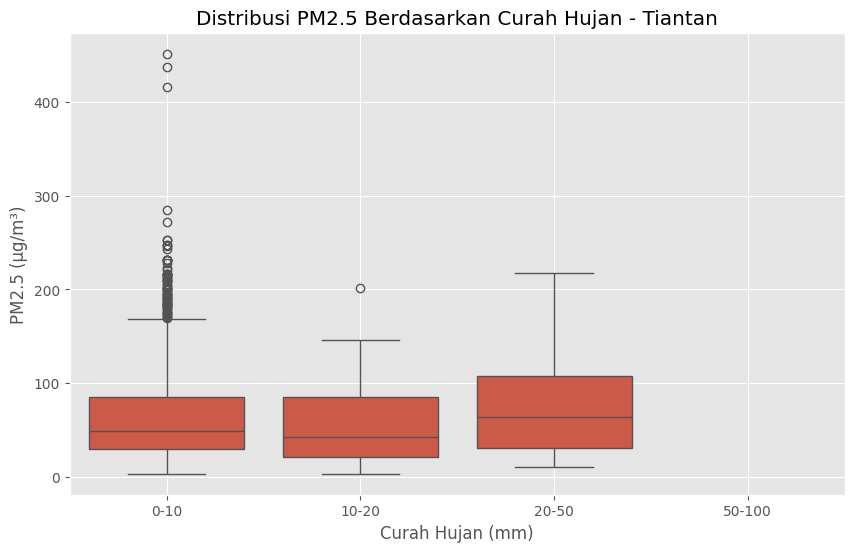

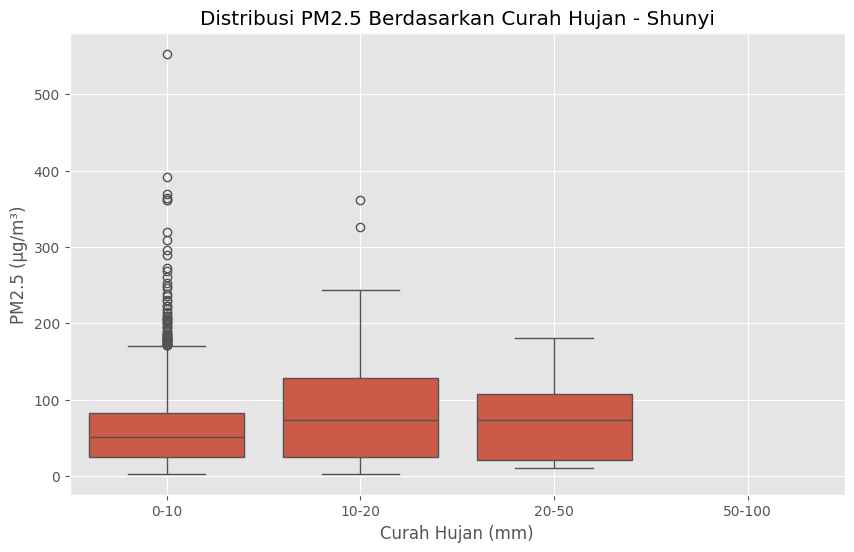

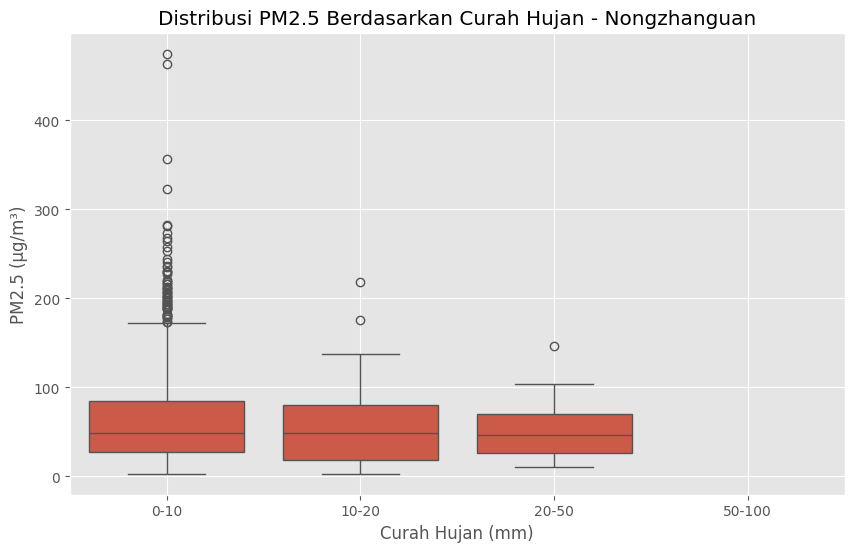

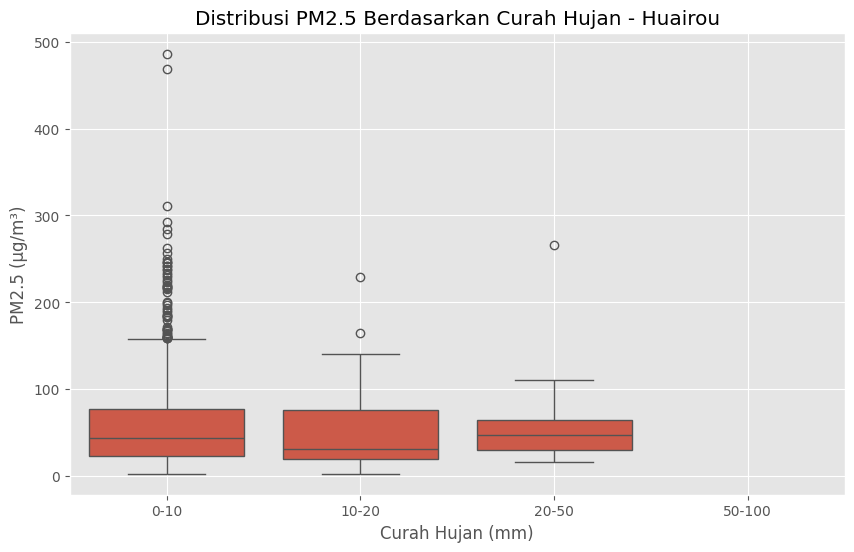

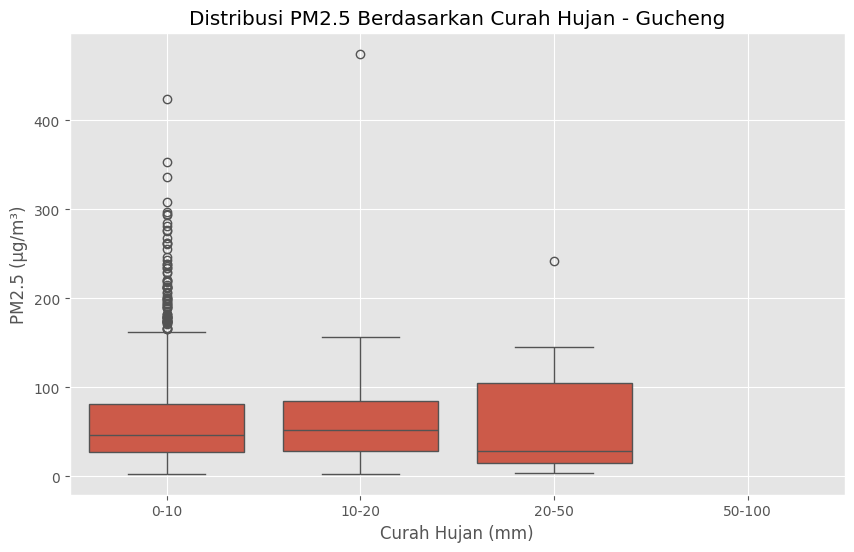

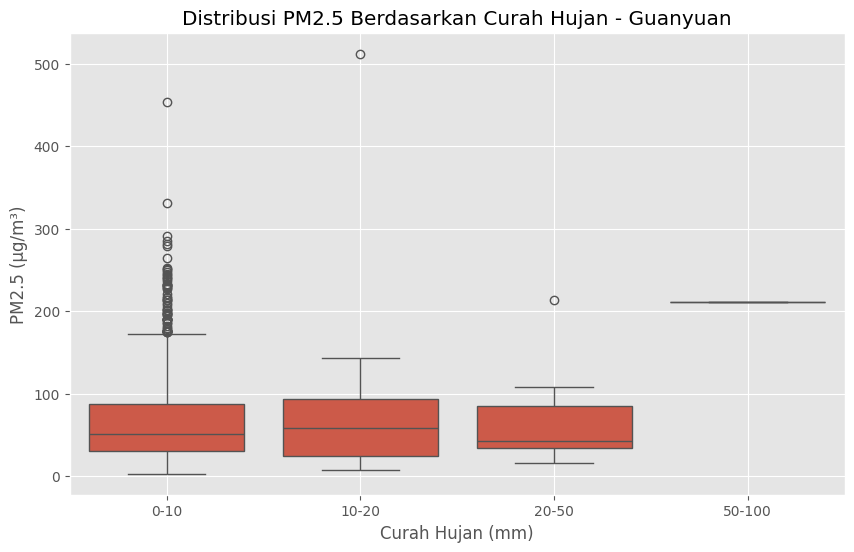

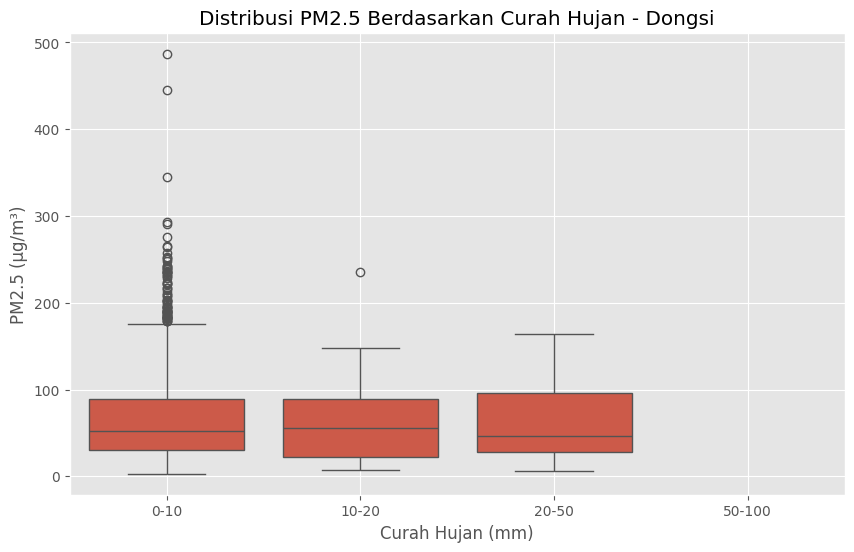

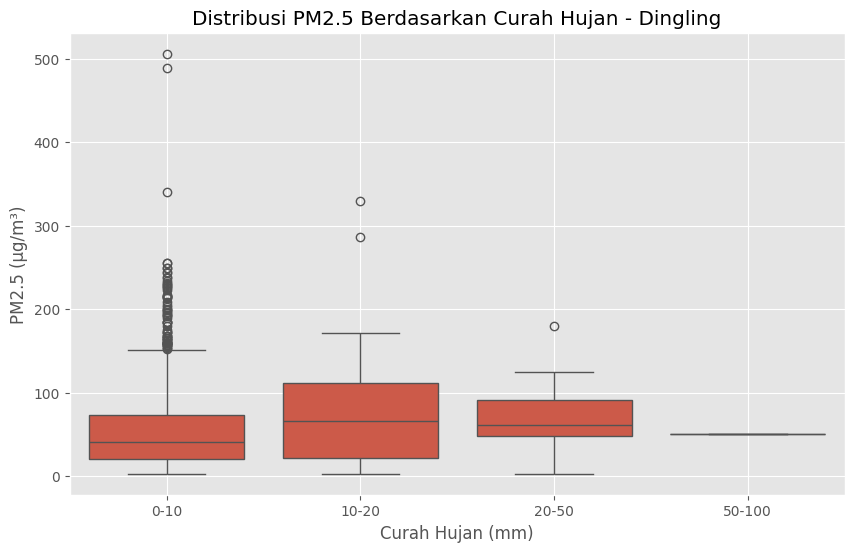

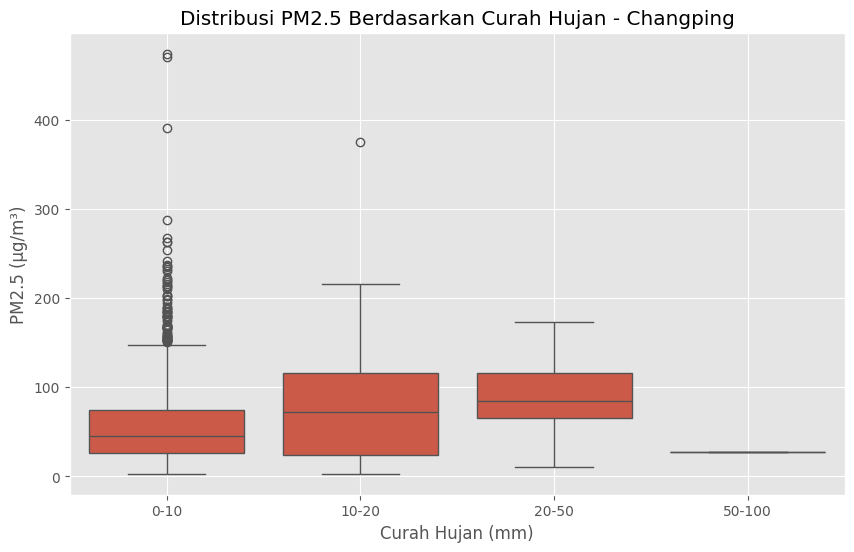

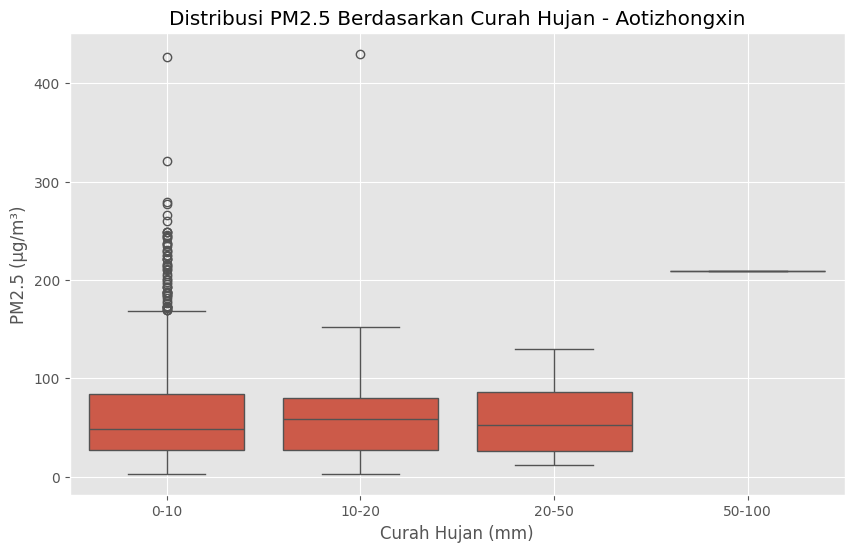

In [26]:
# Distribusi PM2.5 Berdasarkan Curah Hujan (Antar Stasiun)
# List semua stasiun
stations = df['station'].unique()

# Loop untuk setiap stasiun
for station in stations:
    # Filter data berdasarkan stasiun
    station_data = df[df['station'] == station]
    
    # Membuat box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=station_data, 
        x=pd.cut(station_data['RAIN'], bins=[0, 10, 20, 50, 100], labels=['0-10', '10-20', '20-50', '50-100']), 
        y='PM2.5'
    )
    plt.title(f'Distribusi PM2.5 Berdasarkan Curah Hujan - {station}')
    plt.xlabel('Curah Hujan (mm)')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.grid(True)
    plt.show()



**Insight:**

- Dampak Hujan pada PM2.5:
    - Konsentrasi PM2.5 lebih rendah di daerah dengan curah hujan tinggi (≥20 mm), menandakan bahwa hujan efektif dalam membersihkan udara dari polutan.
    - Banyak outlier yang menunjukkan nilai ekstrem PM2.5 (di atas 200 µg/m³), karena hujan rendah kurang efektif membersihkan polusi udara.
    - Hampir tidak ada outlier yang signifikan, menandakan bahwa hujan intensif membantu mengurangi partikel PM2.5 di udara.


## Conclusion

- Conclusion pertanyaan 1
    - Pola Waktu dan Musim:
        - ```PM2.5 lebih tinggi pada malam hari dan selama musim dingin.```
        - ```Polusi lebih rendah pada siang hari dan musim panas karena pengaruh hujan dan angin.```

- Conclusion pertanyaan 2
    - Faktor Cuaca:
        - ```Kecepatan angin dan curah hujan memiliki pengaruh signifikan dalam mengurangi konsentrasi polutan.```

- Conclusion pertanyaan 3
    - Variasi Lokasi/Station:
        - ```Station di pusat kota / aktivitas manusia mencatat konsentrasi polusi yang lebih tinggi dibandingkan stasiun di daerah pedesaan.```
        - ```Beberapa stasiun seperti Dongsi dan Wanshouxigong mencatat rata-rata PM2.5 yang lebih tinggi, sedangkan stasiun seperti Huairou dan Dingling mencatat konsentrasi lebih rendah.```

- Conclusion pertanyaan 4
    - Hubungan Antar Polutan:
        - ```PM2.5 berkorelasi positif dengan PM10, SO2, dan NO2, menunjukkan sumber emisi yang sama (seperti pembakaran bahan bakar fosil).```

- Conclusion pertanyaan 5
    - Pengaruh Musim pada Polusi:
        - ```Hujan memiliki korelasi negatif dengan konsentrasi polutan, terutama PM2.5 karena polutan ini dapat dibersihkan dan mengurangi partikel PM2.5 di udara.```
        